In [1]:
import mnist_classifier
from gan import *
from dataset import *
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
mnist_cnn = mnist_classifier.Net()
mnist_cnn.load_state_dict(torch.load('data/mnist_cnn.pt'))

In [3]:
dev = torch.device('cuda')
mnist_cnn = mnist_cnn.to(device=dev)

In [4]:
FS_label = np.ones(10)*1000
MNIST_label = np.ones(10)*1000
dataset = FasionMNIST_MNIST(32, FS_label, MNIST_label)

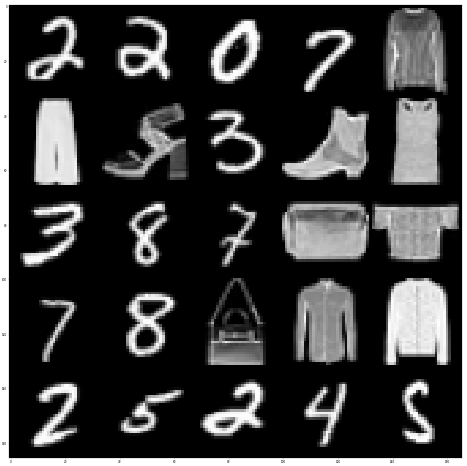

In [5]:
import importlib
import vis
vis = importlib.reload(vis)
_ = vis.show_image_dataset(dataset, n_row=5, n_col=5, augment=False)
import utils
utils = importlib.reload(utils)


tensor([0.9999])

tensor([3, 2, 4, 8, 8, 4, 3, 8, 3, 8, 7, 8, 2, 8, 4, 8, 8, 1, 3, 1, 2, 4, 7, 8,
        4], device='cuda:0')
tensor([1.0000, 1.0000, 0.8095, 0.9839, 0.5174, 0.4526, 1.0000, 0.3656, 1.0000,
        0.9550, 0.9996, 0.5564, 0.6531, 0.6321, 0.9974, 0.6873, 0.4205, 0.9998,
        1.0000, 0.6369, 0.9991, 0.4483, 0.9973, 0.5193, 1.0000],
       device='cuda:0', grad_fn=<MaxBackward0>)


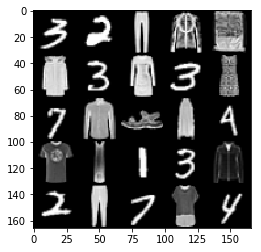

In [20]:
img, label = dataset.sample_batch(25)
img = img.to(dtype=torch.float32, device=dev)
pred = mnist_cnn(img)
pred = torch.exp(pred)
# print(torch.exp(pred))
print(pred.argmax(dim=1))
print(pred.max(dim=1)[0])
vis.showallimg(img, 5)

gan id 9
tensor([0.7161], device='cuda:0', grad_fn=<MaxBackward0>) tensor([2], device='cuda:0') 1 2 0.7161247730255127


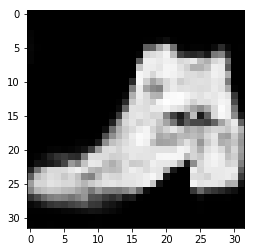

In [55]:
import utils
utils = importlib.reload(utils)
vis = importlib.reload(vis)
imgs = utils.sample_img_from_folder('data/fashion1/', gan_id=None, n_samples=1)
imgs = imgs.to(dtype=torch.float32, device=dev)
log_probs = mnist_cnn(imgs)
probs = torch.exp(log_probs)
preds = log_probs.argmax(dim=1)
prob_max = probs.max(dim=1)[0]
print(prob_max, preds, len(preds), preds[0].item(), prob_max[0].item())
vis.showallimg(imgs, 1)

In [57]:
l = [[0, 1, 'f'], [4, 2, 't'], [9, 4, 'afsd']]
l.sort(key=lambda x: x[2])
print(l)

[[9, 4, 'afsd'], [0, 1, 'f'], [4, 2, 't']]


In [68]:
utils = importlib.reload(utils)
topdata = utils.eval_all_from_folder('data/fashion1/', model=mnist_cnn, device=dev, topk=100, startgan=0, endgan=1, n_batches=50, target=1)

evaluating gan 0


prediction 1 probabitliy max 0.9874075055122375 gan id 49 batch id 28
prediction 1 probabitliy max 0.9874207377433777 gan id 37 batch id 6
prediction 1 probabitliy max 0.9874597787857056 gan id 4 batch id 5
prediction 1 probabitliy max 0.98751300573349 gan id 41 batch id 12
prediction 1 probabitliy max 0.9875332117080688 gan id 49 batch id 47
prediction 1 probabitliy max 0.9876678586006165 gan id 45 batch id 4
prediction 1 probabitliy max 0.9877013564109802 gan id 39 batch id 32
prediction 1 probabitliy max 0.987763524055481 gan id 48 batch id 16
prediction 1 probabitliy max 0.988107442855835 gan id 39 batch id 22
prediction 1 probabitliy max 0.9883741140365601 gan id 37 batch id 47


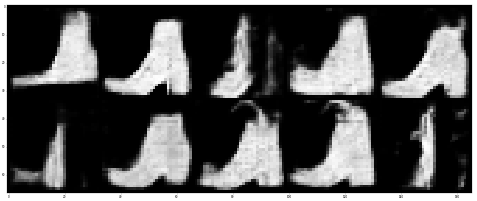

prediction 1 probabitliy max 0.9884156584739685 gan id 41 batch id 42
prediction 1 probabitliy max 0.9884306788444519 gan id 45 batch id 12
prediction 1 probabitliy max 0.9884523749351501 gan id 39 batch id 1
prediction 1 probabitliy max 0.9885013699531555 gan id 31 batch id 37
prediction 1 probabitliy max 0.9885773062705994 gan id 49 batch id 47
prediction 1 probabitliy max 0.9885857701301575 gan id 18 batch id 41
prediction 1 probabitliy max 0.9886381030082703 gan id 49 batch id 41
prediction 1 probabitliy max 0.9887338280677795 gan id 46 batch id 18
prediction 1 probabitliy max 0.9888493418693542 gan id 29 batch id 46
prediction 1 probabitliy max 0.9888624548912048 gan id 16 batch id 22


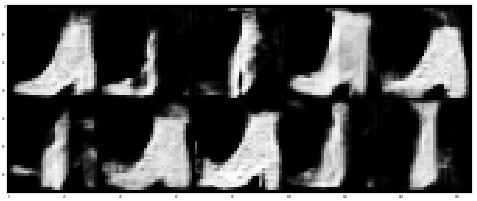

prediction 1 probabitliy max 0.9889002442359924 gan id 49 batch id 1
prediction 1 probabitliy max 0.9889355897903442 gan id 47 batch id 7
prediction 1 probabitliy max 0.988950252532959 gan id 34 batch id 22
prediction 1 probabitliy max 0.9889931678771973 gan id 48 batch id 13
prediction 1 probabitliy max 0.989078938961029 gan id 49 batch id 6
prediction 1 probabitliy max 0.9891478419303894 gan id 48 batch id 15
prediction 1 probabitliy max 0.9892567992210388 gan id 31 batch id 24
prediction 1 probabitliy max 0.9892869591712952 gan id 37 batch id 2
prediction 1 probabitliy max 0.9893351197242737 gan id 3 batch id 36
prediction 1 probabitliy max 0.989403486251831 gan id 45 batch id 25


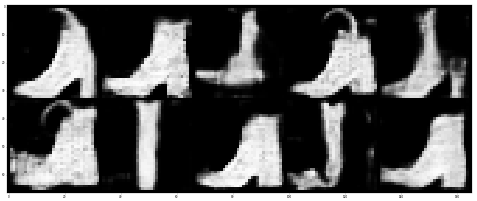

prediction 1 probabitliy max 0.9894473552703857 gan id 37 batch id 24
prediction 1 probabitliy max 0.9894742965698242 gan id 49 batch id 18
prediction 1 probabitliy max 0.9894837737083435 gan id 37 batch id 2
prediction 1 probabitliy max 0.9897399544715881 gan id 31 batch id 5
prediction 1 probabitliy max 0.9897711277008057 gan id 31 batch id 22
prediction 1 probabitliy max 0.9898159503936768 gan id 40 batch id 29
prediction 1 probabitliy max 0.9900368452072144 gan id 24 batch id 1
prediction 1 probabitliy max 0.9902256727218628 gan id 31 batch id 8
prediction 1 probabitliy max 0.9902478456497192 gan id 31 batch id 0
prediction 1 probabitliy max 0.9903016686439514 gan id 47 batch id 32


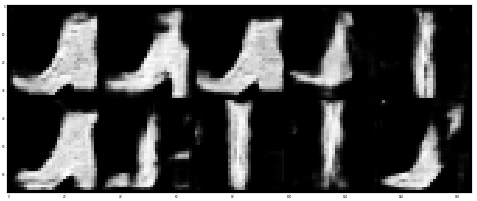

prediction 1 probabitliy max 0.9905085563659668 gan id 10 batch id 10
prediction 1 probabitliy max 0.9905264973640442 gan id 9 batch id 42
prediction 1 probabitliy max 0.9905392527580261 gan id 48 batch id 36
prediction 1 probabitliy max 0.9907352924346924 gan id 40 batch id 28
prediction 1 probabitliy max 0.9907849431037903 gan id 19 batch id 22
prediction 1 probabitliy max 0.9909072518348694 gan id 11 batch id 21
prediction 1 probabitliy max 0.9909276366233826 gan id 41 batch id 27
prediction 1 probabitliy max 0.991066038608551 gan id 15 batch id 38
prediction 1 probabitliy max 0.9913605451583862 gan id 40 batch id 5
prediction 1 probabitliy max 0.9914243221282959 gan id 45 batch id 31


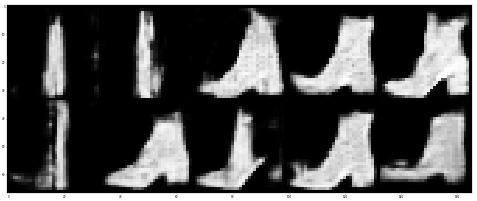

prediction 1 probabitliy max 0.9914281368255615 gan id 31 batch id 45
prediction 1 probabitliy max 0.9914857745170593 gan id 15 batch id 38
prediction 1 probabitliy max 0.9915690422058105 gan id 9 batch id 46
prediction 1 probabitliy max 0.9916834235191345 gan id 48 batch id 11
prediction 1 probabitliy max 0.9917429685592651 gan id 49 batch id 29
prediction 1 probabitliy max 0.99174964427948 gan id 31 batch id 37
prediction 1 probabitliy max 0.9917567372322083 gan id 37 batch id 44
prediction 1 probabitliy max 0.9917709231376648 gan id 20 batch id 38
prediction 1 probabitliy max 0.9917779564857483 gan id 49 batch id 41
prediction 1 probabitliy max 0.9919614791870117 gan id 36 batch id 6


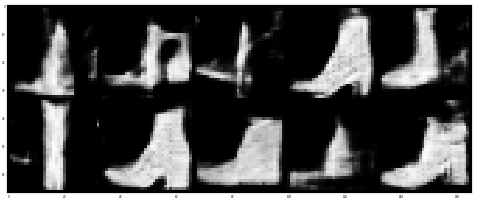

prediction 1 probabitliy max 0.9920106530189514 gan id 40 batch id 16
prediction 1 probabitliy max 0.9921431541442871 gan id 40 batch id 3
prediction 1 probabitliy max 0.9922515153884888 gan id 37 batch id 26
prediction 1 probabitliy max 0.9923016428947449 gan id 8 batch id 14
prediction 1 probabitliy max 0.9924014806747437 gan id 4 batch id 3
prediction 1 probabitliy max 0.9924100041389465 gan id 38 batch id 14
prediction 1 probabitliy max 0.9925434589385986 gan id 12 batch id 0
prediction 1 probabitliy max 0.9925538301467896 gan id 45 batch id 29
prediction 1 probabitliy max 0.9926978349685669 gan id 40 batch id 27
prediction 1 probabitliy max 0.9929326176643372 gan id 25 batch id 20


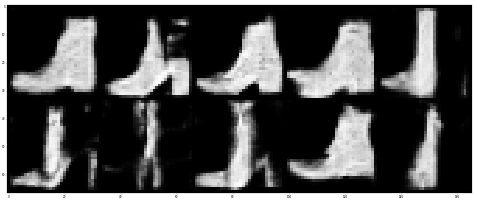

prediction 1 probabitliy max 0.9930561780929565 gan id 40 batch id 10
prediction 1 probabitliy max 0.9931238889694214 gan id 43 batch id 35
prediction 1 probabitliy max 0.9933294653892517 gan id 36 batch id 21
prediction 1 probabitliy max 0.9936791062355042 gan id 41 batch id 30
prediction 1 probabitliy max 0.99388188123703 gan id 40 batch id 18
prediction 1 probabitliy max 0.99396151304245 gan id 36 batch id 42
prediction 1 probabitliy max 0.9941160082817078 gan id 31 batch id 26
prediction 1 probabitliy max 0.9944990873336792 gan id 31 batch id 29
prediction 1 probabitliy max 0.9947770833969116 gan id 45 batch id 31
prediction 1 probabitliy max 0.9948007464408875 gan id 20 batch id 19


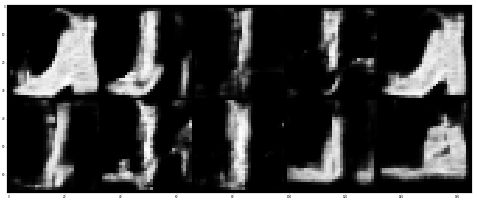

prediction 1 probabitliy max 0.994928777217865 gan id 49 batch id 22
prediction 1 probabitliy max 0.9950721263885498 gan id 45 batch id 14
prediction 1 probabitliy max 0.9951912760734558 gan id 49 batch id 23
prediction 1 probabitliy max 0.995392918586731 gan id 31 batch id 6
prediction 1 probabitliy max 0.9958468079566956 gan id 10 batch id 31
prediction 1 probabitliy max 0.9958885908126831 gan id 4 batch id 22
prediction 1 probabitliy max 0.9959845542907715 gan id 43 batch id 45
prediction 1 probabitliy max 0.9961602687835693 gan id 45 batch id 18
prediction 1 probabitliy max 0.9962676167488098 gan id 30 batch id 39
prediction 1 probabitliy max 0.996288537979126 gan id 8 batch id 49


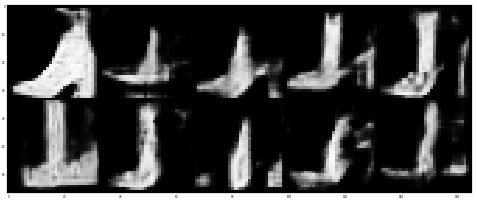

prediction 1 probabitliy max 0.9965679049491882 gan id 31 batch id 41
prediction 1 probabitliy max 0.9971544146537781 gan id 40 batch id 32
prediction 1 probabitliy max 0.9980164170265198 gan id 9 batch id 38
prediction 1 probabitliy max 0.9981858134269714 gan id 31 batch id 23
prediction 1 probabitliy max 0.9983943700790405 gan id 45 batch id 39
prediction 1 probabitliy max 0.9984981417655945 gan id 11 batch id 23
prediction 1 probabitliy max 0.9985295534133911 gan id 38 batch id 13
prediction 1 probabitliy max 0.9985533356666565 gan id 9 batch id 47
prediction 1 probabitliy max 0.9989829659461975 gan id 31 batch id 49
prediction 1 probabitliy max 0.9998102784156799 gan id 31 batch id 36


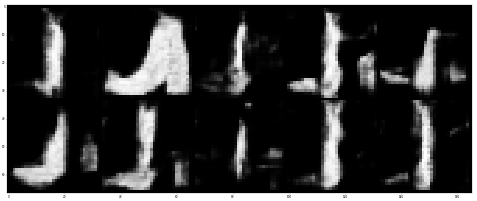

In [67]:
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

prediction 1 probabitliy max 0.5845388174057007 gan id 0 batch id 31
prediction 1 probabitliy max 0.5853267908096313 gan id 0 batch id 31
prediction 1 probabitliy max 0.5897868275642395 gan id 0 batch id 24
prediction 1 probabitliy max 0.58987957239151 gan id 0 batch id 32
prediction 1 probabitliy max 0.5900610685348511 gan id 0 batch id 47
prediction 1 probabitliy max 0.5909764766693115 gan id 0 batch id 48
prediction 1 probabitliy max 0.5933585166931152 gan id 0 batch id 4
prediction 1 probabitliy max 0.5938504934310913 gan id 0 batch id 7
prediction 1 probabitliy max 0.5955519676208496 gan id 0 batch id 20
prediction 1 probabitliy max 0.5970655083656311 gan id 0 batch id 43


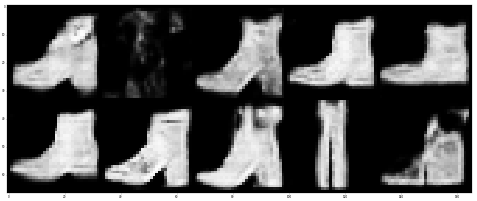

prediction 1 probabitliy max 0.6018154621124268 gan id 0 batch id 26
prediction 1 probabitliy max 0.6029421091079712 gan id 0 batch id 40
prediction 1 probabitliy max 0.6051619052886963 gan id 0 batch id 39
prediction 1 probabitliy max 0.6076619625091553 gan id 0 batch id 5
prediction 1 probabitliy max 0.6078342199325562 gan id 0 batch id 44
prediction 1 probabitliy max 0.6079245209693909 gan id 0 batch id 37
prediction 1 probabitliy max 0.6083322167396545 gan id 0 batch id 33
prediction 1 probabitliy max 0.6110849380493164 gan id 0 batch id 28
prediction 1 probabitliy max 0.6116175055503845 gan id 0 batch id 49
prediction 1 probabitliy max 0.6119189858436584 gan id 0 batch id 46


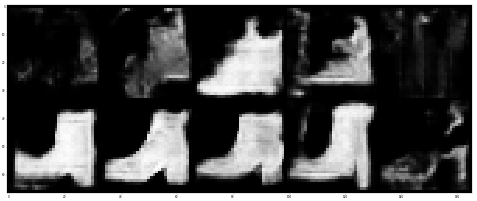

prediction 1 probabitliy max 0.6119706034660339 gan id 0 batch id 13
prediction 1 probabitliy max 0.6130403280258179 gan id 0 batch id 1
prediction 1 probabitliy max 0.6184267401695251 gan id 0 batch id 14
prediction 1 probabitliy max 0.6187178492546082 gan id 0 batch id 40
prediction 1 probabitliy max 0.619060218334198 gan id 0 batch id 40
prediction 1 probabitliy max 0.6198456287384033 gan id 0 batch id 8
prediction 1 probabitliy max 0.6201554536819458 gan id 0 batch id 4
prediction 1 probabitliy max 0.6214173436164856 gan id 0 batch id 4
prediction 1 probabitliy max 0.6228299736976624 gan id 0 batch id 29
prediction 1 probabitliy max 0.6253738403320312 gan id 0 batch id 43


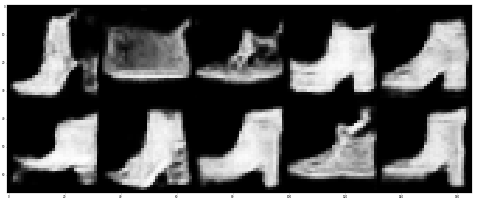

prediction 1 probabitliy max 0.6259350180625916 gan id 0 batch id 31
prediction 1 probabitliy max 0.627377986907959 gan id 0 batch id 36
prediction 1 probabitliy max 0.6290656924247742 gan id 0 batch id 32
prediction 1 probabitliy max 0.6302708983421326 gan id 0 batch id 20
prediction 1 probabitliy max 0.6328067779541016 gan id 0 batch id 48
prediction 1 probabitliy max 0.6412111520767212 gan id 0 batch id 15
prediction 1 probabitliy max 0.6417978405952454 gan id 0 batch id 27
prediction 1 probabitliy max 0.6441698670387268 gan id 0 batch id 28
prediction 1 probabitliy max 0.6511531472206116 gan id 0 batch id 21
prediction 1 probabitliy max 0.6522277593612671 gan id 0 batch id 18


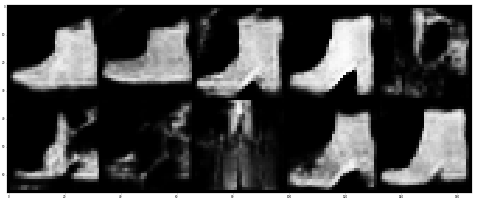

prediction 1 probabitliy max 0.6529917120933533 gan id 0 batch id 20
prediction 1 probabitliy max 0.6539481282234192 gan id 0 batch id 7
prediction 1 probabitliy max 0.6550281047821045 gan id 0 batch id 3
prediction 1 probabitliy max 0.656201183795929 gan id 0 batch id 6
prediction 1 probabitliy max 0.6598519682884216 gan id 0 batch id 25
prediction 1 probabitliy max 0.6631932258605957 gan id 0 batch id 7
prediction 1 probabitliy max 0.6656679511070251 gan id 0 batch id 28
prediction 1 probabitliy max 0.6657384037971497 gan id 0 batch id 9
prediction 1 probabitliy max 0.6688021421432495 gan id 0 batch id 40
prediction 1 probabitliy max 0.671792209148407 gan id 0 batch id 48


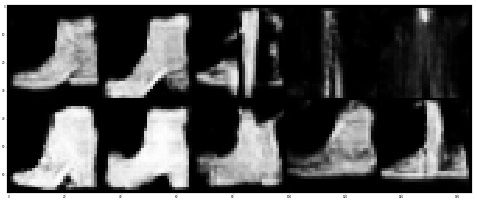

prediction 1 probabitliy max 0.6729564070701599 gan id 0 batch id 10
prediction 1 probabitliy max 0.6747962832450867 gan id 0 batch id 47
prediction 1 probabitliy max 0.6758509278297424 gan id 0 batch id 49
prediction 1 probabitliy max 0.6795201897621155 gan id 0 batch id 38
prediction 1 probabitliy max 0.684840977191925 gan id 0 batch id 48
prediction 1 probabitliy max 0.6851741075515747 gan id 0 batch id 46
prediction 1 probabitliy max 0.6863820552825928 gan id 0 batch id 13
prediction 1 probabitliy max 0.6870120763778687 gan id 0 batch id 35
prediction 1 probabitliy max 0.6947176456451416 gan id 0 batch id 25
prediction 1 probabitliy max 0.7008548378944397 gan id 0 batch id 7


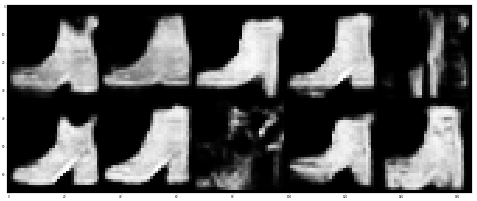

prediction 1 probabitliy max 0.7024986743927002 gan id 0 batch id 2
prediction 1 probabitliy max 0.703318178653717 gan id 0 batch id 17
prediction 1 probabitliy max 0.7034388780593872 gan id 0 batch id 9
prediction 1 probabitliy max 0.7050986886024475 gan id 0 batch id 26
prediction 1 probabitliy max 0.714997410774231 gan id 0 batch id 33
prediction 1 probabitliy max 0.7155160903930664 gan id 0 batch id 14
prediction 1 probabitliy max 0.7187154293060303 gan id 0 batch id 22
prediction 1 probabitliy max 0.7290124893188477 gan id 0 batch id 2
prediction 1 probabitliy max 0.7379471659660339 gan id 0 batch id 32
prediction 1 probabitliy max 0.7437129020690918 gan id 0 batch id 45


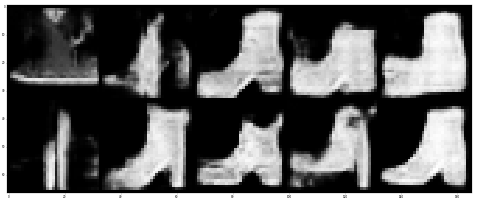

prediction 1 probabitliy max 0.745307981967926 gan id 0 batch id 1
prediction 1 probabitliy max 0.7520498633384705 gan id 0 batch id 46
prediction 1 probabitliy max 0.7553389668464661 gan id 0 batch id 39
prediction 1 probabitliy max 0.762298047542572 gan id 0 batch id 40
prediction 1 probabitliy max 0.7658244967460632 gan id 0 batch id 0
prediction 1 probabitliy max 0.7691147923469543 gan id 0 batch id 7
prediction 1 probabitliy max 0.7715787887573242 gan id 0 batch id 17
prediction 1 probabitliy max 0.7723687291145325 gan id 0 batch id 41
prediction 1 probabitliy max 0.778253972530365 gan id 0 batch id 41
prediction 1 probabitliy max 0.7815111875534058 gan id 0 batch id 41


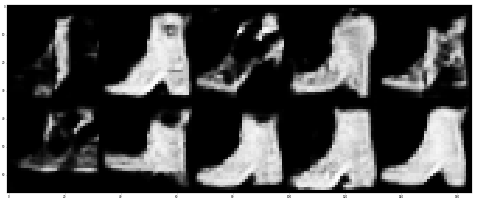

prediction 1 probabitliy max 0.7818183302879333 gan id 0 batch id 46
prediction 1 probabitliy max 0.7820726037025452 gan id 0 batch id 3
prediction 1 probabitliy max 0.7848225235939026 gan id 0 batch id 31
prediction 1 probabitliy max 0.7863981127738953 gan id 0 batch id 18
prediction 1 probabitliy max 0.7868895530700684 gan id 0 batch id 9
prediction 1 probabitliy max 0.7974010705947876 gan id 0 batch id 8
prediction 1 probabitliy max 0.8000743985176086 gan id 0 batch id 32
prediction 1 probabitliy max 0.8094471096992493 gan id 0 batch id 27
prediction 1 probabitliy max 0.8102240562438965 gan id 0 batch id 21
prediction 1 probabitliy max 0.8251046538352966 gan id 0 batch id 25


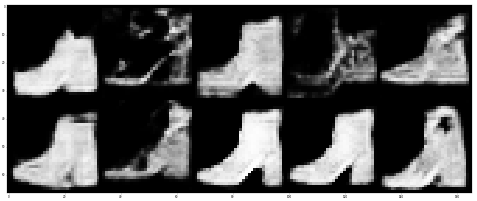

prediction 1 probabitliy max 0.8254914879798889 gan id 0 batch id 29
prediction 1 probabitliy max 0.8334779739379883 gan id 0 batch id 0
prediction 1 probabitliy max 0.8376482725143433 gan id 0 batch id 37
prediction 1 probabitliy max 0.8393619656562805 gan id 0 batch id 24
prediction 1 probabitliy max 0.854399561882019 gan id 0 batch id 7
prediction 1 probabitliy max 0.8581199645996094 gan id 0 batch id 11
prediction 1 probabitliy max 0.864637553691864 gan id 0 batch id 15
prediction 1 probabitliy max 0.8670611381530762 gan id 0 batch id 10
prediction 1 probabitliy max 0.8832525610923767 gan id 0 batch id 45
prediction 1 probabitliy max 0.960742712020874 gan id 0 batch id 11


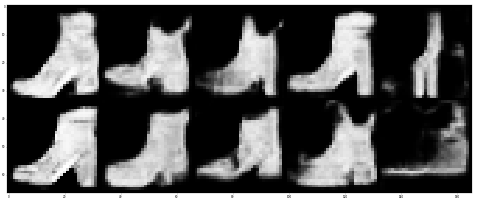

In [69]:
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

In [4]:
import fmnist_classifier
import torch
import numpy as np
dev1 = torch.device('cuda:1')
fmnist_cnn = fmnist_classifier.FNet()
fmnist_cnn.load_state_dict(torch.load('data/fmnist_cnn.pt'))
fmnist_cnn = fmnist_cnn.to(device=dev1)
fdataset = fmnist_classifier.FasionMNIST_MNIST(size=32, FS_label_count=5000*np.ones(10), MNIST_label_count=5000*np.ones(10))


tensor([18.,  4., 19.,  6.,  1.,  4.,  2.,  0., 16., 19., 16.,  0.,  6.,  5.,
        16., 18., 10.,  6., 19.,  0., 16., 11., 10., 14.,  1.])
torch.Size([25, 20])
tensor([18,  4, 19,  6,  1,  4,  2,  0, 16, 19, 16,  0,  6,  5, 16, 18, 10,  6,
        19,  0, 16, 11, 10, 14,  1], device='cuda:1')
tensor([0.9999, 0.9241, 0.9964, 0.5479, 0.9588, 0.9727, 0.9868, 0.8632, 1.0000,
        1.0000, 1.0000, 0.9083, 0.9915, 1.0000, 1.0000, 1.0000, 1.0000, 0.9985,
        1.0000, 0.9874, 0.7515, 1.0000, 1.0000, 1.0000, 1.0000],
       device='cuda:1', grad_fn=<MaxBackward0>)


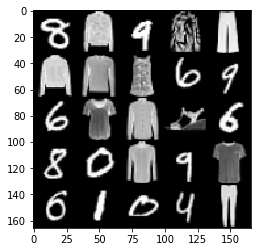

In [18]:
import utils
import vis
import importlib
utils = importlib.reload(utils)
vis = importlib.reload(vis)
img, label = fdataset.sample_batch_uniform(25)
img = img.to(dtype=torch.float32, device=dev1)
pred = fmnist_cnn(img)
pred = torch.exp(pred)
print(label)
print(pred.shape)
print(pred.argmax(dim=1))
print(pred.max(dim=1)[0])
vis.showallimg(img, 5)

In [65]:
dev = torch.device('cuda')
topdata = utils.eval_all_from_folder('data/fashion_mwu/', model=fmnist_cnn, device=dev, topk=300, startgan=0, endgan=50, n_batches=50, target=11)

evaluating gan 0
evaluating gan 1
evaluating gan 2
evaluating gan 3
evaluating gan 4
evaluating gan 5
evaluating gan 6
evaluating gan 7
evaluating gan 8
evaluating gan 9
evaluating gan 10
evaluating gan 11
evaluating gan 12
evaluating gan 13
evaluating gan 14
evaluating gan 15
evaluating gan 16
evaluating gan 17
evaluating gan 18
evaluating gan 19
evaluating gan 20
evaluating gan 21
evaluating gan 22
evaluating gan 23
evaluating gan 24
evaluating gan 25
evaluating gan 26
evaluating gan 27
evaluating gan 28
evaluating gan 29
evaluating gan 30
evaluating gan 31
evaluating gan 32
evaluating gan 33
evaluating gan 34
evaluating gan 35
evaluating gan 36
evaluating gan 37
evaluating gan 38
evaluating gan 39
evaluating gan 40
evaluating gan 41
evaluating gan 42
evaluating gan 43
evaluating gan 44
evaluating gan 45
evaluating gan 46
evaluating gan 47
evaluating gan 48
evaluating gan 49


299
prediction 11 probabitliy max 0.3345174789428711 gan id 2 batch id 37
prediction 11 probabitliy max 0.33674705028533936 gan id 25 batch id 15
prediction 11 probabitliy max 0.34292128682136536 gan id 36 batch id 20
prediction 11 probabitliy max 0.3436785638332367 gan id 7 batch id 44
prediction 11 probabitliy max 0.34455955028533936 gan id 22 batch id 14
prediction 11 probabitliy max 0.34719306230545044 gan id 32 batch id 16
prediction 11 probabitliy max 0.3478856086730957 gan id 36 batch id 14
prediction 11 probabitliy max 0.34908536076545715 gan id 37 batch id 9
prediction 11 probabitliy max 0.35152629017829895 gan id 2 batch id 7
prediction 11 probabitliy max 0.3516736924648285 gan id 34 batch id 17


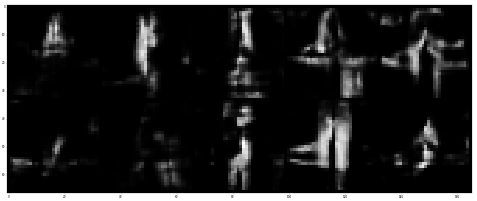

prediction 11 probabitliy max 0.35179561376571655 gan id 45 batch id 9
prediction 11 probabitliy max 0.35375717282295227 gan id 5 batch id 25
prediction 11 probabitliy max 0.358844518661499 gan id 23 batch id 7
prediction 11 probabitliy max 0.3593578636646271 gan id 16 batch id 10
prediction 11 probabitliy max 0.3623311221599579 gan id 45 batch id 21
prediction 11 probabitliy max 0.36673521995544434 gan id 9 batch id 13
prediction 11 probabitliy max 0.367059588432312 gan id 40 batch id 5
prediction 11 probabitliy max 0.36738649010658264 gan id 17 batch id 9
prediction 11 probabitliy max 0.37009793519973755 gan id 25 batch id 5
prediction 11 probabitliy max 0.3710134029388428 gan id 41 batch id 17


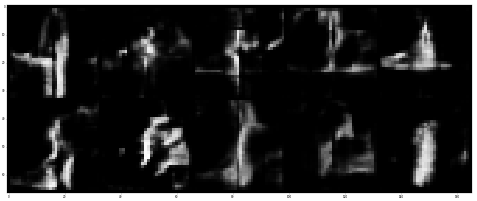

prediction 11 probabitliy max 0.37194254994392395 gan id 39 batch id 28
prediction 11 probabitliy max 0.37374147772789 gan id 35 batch id 0
prediction 11 probabitliy max 0.37534239888191223 gan id 29 batch id 35
prediction 11 probabitliy max 0.376342236995697 gan id 40 batch id 29
prediction 11 probabitliy max 0.3790276050567627 gan id 16 batch id 20
prediction 11 probabitliy max 0.3823867440223694 gan id 39 batch id 42
prediction 11 probabitliy max 0.38323190808296204 gan id 11 batch id 22
prediction 11 probabitliy max 0.3841717541217804 gan id 34 batch id 31
prediction 11 probabitliy max 0.38448935747146606 gan id 5 batch id 20
prediction 11 probabitliy max 0.3892197906970978 gan id 6 batch id 49


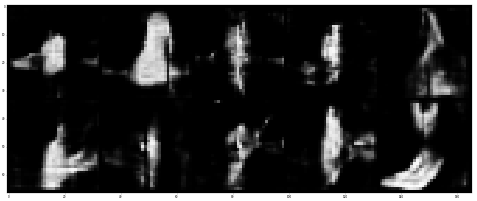

prediction 11 probabitliy max 0.3903857469558716 gan id 10 batch id 49
prediction 11 probabitliy max 0.3919719457626343 gan id 39 batch id 30
prediction 11 probabitliy max 0.39225074648857117 gan id 49 batch id 43
prediction 11 probabitliy max 0.39629051089286804 gan id 25 batch id 6
prediction 11 probabitliy max 0.3987242877483368 gan id 41 batch id 10
prediction 11 probabitliy max 0.3987950384616852 gan id 9 batch id 14
prediction 11 probabitliy max 0.400258868932724 gan id 7 batch id 47
prediction 11 probabitliy max 0.40293774008750916 gan id 10 batch id 11
prediction 11 probabitliy max 0.4059940278530121 gan id 26 batch id 13
prediction 11 probabitliy max 0.40740349888801575 gan id 19 batch id 26


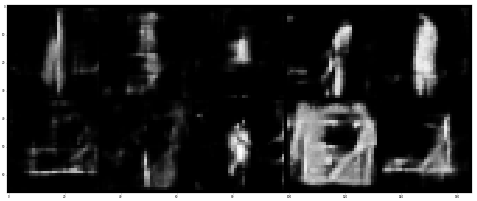

prediction 11 probabitliy max 0.4084332585334778 gan id 26 batch id 1
prediction 11 probabitliy max 0.40874263644218445 gan id 44 batch id 26
prediction 11 probabitliy max 0.41591334342956543 gan id 23 batch id 21
prediction 11 probabitliy max 0.4186532497406006 gan id 30 batch id 42
prediction 11 probabitliy max 0.42002514004707336 gan id 8 batch id 41
prediction 11 probabitliy max 0.4235255718231201 gan id 41 batch id 8
prediction 11 probabitliy max 0.42376092076301575 gan id 25 batch id 10
prediction 11 probabitliy max 0.4257463812828064 gan id 21 batch id 0
prediction 11 probabitliy max 0.4260859489440918 gan id 44 batch id 18
prediction 11 probabitliy max 0.4291313886642456 gan id 15 batch id 39


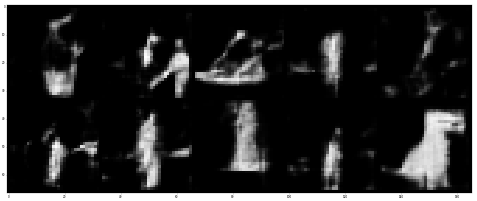

prediction 11 probabitliy max 0.4314628839492798 gan id 37 batch id 23
prediction 11 probabitliy max 0.43307167291641235 gan id 31 batch id 17
prediction 11 probabitliy max 0.4332769811153412 gan id 24 batch id 25
prediction 11 probabitliy max 0.4379747807979584 gan id 48 batch id 23
prediction 11 probabitliy max 0.44349831342697144 gan id 8 batch id 41
prediction 11 probabitliy max 0.44499555230140686 gan id 39 batch id 40
prediction 11 probabitliy max 0.45794206857681274 gan id 20 batch id 10
prediction 11 probabitliy max 0.4594935476779938 gan id 39 batch id 37
prediction 11 probabitliy max 0.459710955619812 gan id 10 batch id 49
prediction 11 probabitliy max 0.46042853593826294 gan id 2 batch id 7


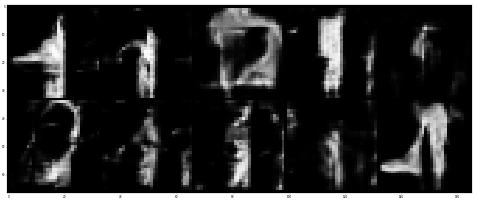

prediction 11 probabitliy max 0.46070942282676697 gan id 20 batch id 16
prediction 11 probabitliy max 0.461559534072876 gan id 12 batch id 21
prediction 11 probabitliy max 0.4664091467857361 gan id 41 batch id 41
prediction 11 probabitliy max 0.47120729088783264 gan id 31 batch id 44
prediction 11 probabitliy max 0.47652533650398254 gan id 37 batch id 20
prediction 11 probabitliy max 0.4786859452724457 gan id 31 batch id 15
prediction 11 probabitliy max 0.4792477786540985 gan id 25 batch id 48
prediction 11 probabitliy max 0.4815453588962555 gan id 31 batch id 7
prediction 11 probabitliy max 0.48288336396217346 gan id 45 batch id 26
prediction 11 probabitliy max 0.4830245077610016 gan id 39 batch id 16


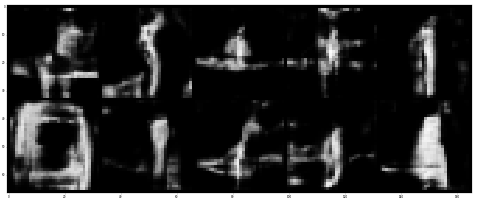

prediction 11 probabitliy max 0.486402690410614 gan id 31 batch id 30
prediction 11 probabitliy max 0.4876358211040497 gan id 7 batch id 31
prediction 11 probabitliy max 0.489149808883667 gan id 49 batch id 42
prediction 11 probabitliy max 0.49342697858810425 gan id 24 batch id 22
prediction 11 probabitliy max 0.4948980510234833 gan id 48 batch id 10
prediction 11 probabitliy max 0.49513858556747437 gan id 37 batch id 38
prediction 11 probabitliy max 0.4968163073062897 gan id 11 batch id 0
prediction 11 probabitliy max 0.4986932575702667 gan id 15 batch id 8
prediction 11 probabitliy max 0.5004338622093201 gan id 1 batch id 16
prediction 11 probabitliy max 0.5042378902435303 gan id 21 batch id 17


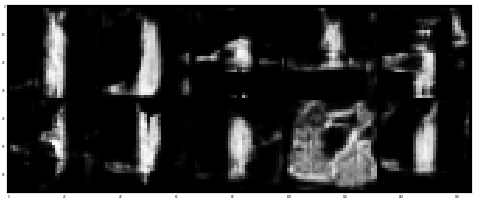

prediction 11 probabitliy max 0.5060190558433533 gan id 35 batch id 42
prediction 11 probabitliy max 0.5061978697776794 gan id 41 batch id 48
prediction 11 probabitliy max 0.5118215084075928 gan id 8 batch id 47
prediction 11 probabitliy max 0.5133919715881348 gan id 47 batch id 20
prediction 11 probabitliy max 0.513620913028717 gan id 4 batch id 44
prediction 11 probabitliy max 0.5137125253677368 gan id 33 batch id 45
prediction 11 probabitliy max 0.5156677961349487 gan id 31 batch id 31
prediction 11 probabitliy max 0.5174417495727539 gan id 31 batch id 24
prediction 11 probabitliy max 0.5234203934669495 gan id 32 batch id 31
prediction 11 probabitliy max 0.5250146389007568 gan id 32 batch id 33


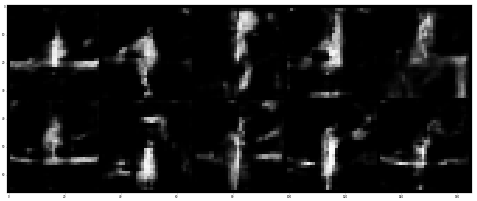

prediction 11 probabitliy max 0.5263574719429016 gan id 41 batch id 34
prediction 11 probabitliy max 0.526742160320282 gan id 47 batch id 31
prediction 11 probabitliy max 0.5287570953369141 gan id 15 batch id 18
prediction 11 probabitliy max 0.5296120047569275 gan id 31 batch id 45
prediction 11 probabitliy max 0.5303337574005127 gan id 39 batch id 38
prediction 11 probabitliy max 0.534099817276001 gan id 31 batch id 32
prediction 11 probabitliy max 0.5345706939697266 gan id 31 batch id 49
prediction 11 probabitliy max 0.534591555595398 gan id 41 batch id 6
prediction 11 probabitliy max 0.5374686121940613 gan id 8 batch id 43
prediction 11 probabitliy max 0.5387983322143555 gan id 16 batch id 15


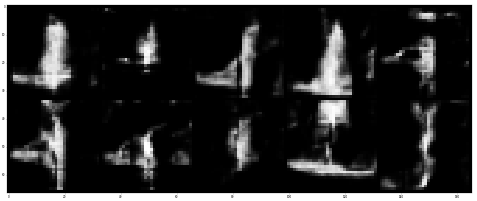

prediction 11 probabitliy max 0.5428491830825806 gan id 30 batch id 39
prediction 11 probabitliy max 0.5514422655105591 gan id 39 batch id 43
prediction 11 probabitliy max 0.5534906983375549 gan id 32 batch id 43
prediction 11 probabitliy max 0.5548626780509949 gan id 34 batch id 45
prediction 11 probabitliy max 0.5593294501304626 gan id 9 batch id 11
prediction 11 probabitliy max 0.563001811504364 gan id 37 batch id 18
prediction 11 probabitliy max 0.5679174065589905 gan id 3 batch id 18
prediction 11 probabitliy max 0.5711238384246826 gan id 13 batch id 23
prediction 11 probabitliy max 0.5739051699638367 gan id 0 batch id 31
prediction 11 probabitliy max 0.5771123170852661 gan id 11 batch id 11


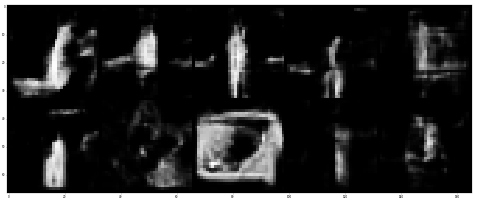

prediction 11 probabitliy max 0.5779502987861633 gan id 38 batch id 10
prediction 11 probabitliy max 0.5787004232406616 gan id 41 batch id 0
prediction 11 probabitliy max 0.5794404149055481 gan id 19 batch id 13
prediction 11 probabitliy max 0.5817970037460327 gan id 11 batch id 32
prediction 11 probabitliy max 0.5820245742797852 gan id 34 batch id 22
prediction 11 probabitliy max 0.582422137260437 gan id 23 batch id 31
prediction 11 probabitliy max 0.5837823152542114 gan id 31 batch id 15
prediction 11 probabitliy max 0.5849810838699341 gan id 1 batch id 8
prediction 11 probabitliy max 0.5893718600273132 gan id 0 batch id 43
prediction 11 probabitliy max 0.5942949056625366 gan id 47 batch id 19


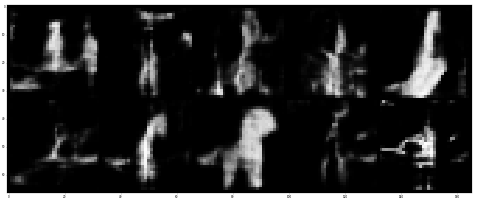

prediction 11 probabitliy max 0.6011887788772583 gan id 31 batch id 21
prediction 11 probabitliy max 0.603866457939148 gan id 30 batch id 24
prediction 11 probabitliy max 0.6073091626167297 gan id 31 batch id 47
prediction 11 probabitliy max 0.6134941577911377 gan id 7 batch id 19
prediction 11 probabitliy max 0.6150327920913696 gan id 47 batch id 48
prediction 11 probabitliy max 0.6175550818443298 gan id 41 batch id 31
prediction 11 probabitliy max 0.6184992790222168 gan id 40 batch id 46
prediction 11 probabitliy max 0.6191198229789734 gan id 34 batch id 43
prediction 11 probabitliy max 0.6209529042243958 gan id 16 batch id 30
prediction 11 probabitliy max 0.6213856339454651 gan id 13 batch id 9


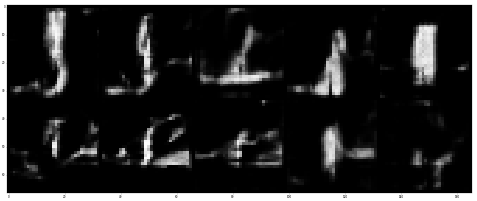

prediction 11 probabitliy max 0.6244527697563171 gan id 7 batch id 13
prediction 11 probabitliy max 0.6270630359649658 gan id 21 batch id 41
prediction 11 probabitliy max 0.6286938786506653 gan id 31 batch id 27
prediction 11 probabitliy max 0.6323398947715759 gan id 31 batch id 22
prediction 11 probabitliy max 0.6434835195541382 gan id 24 batch id 1
prediction 11 probabitliy max 0.6435117721557617 gan id 41 batch id 34
prediction 11 probabitliy max 0.6455389261245728 gan id 8 batch id 44
prediction 11 probabitliy max 0.6492838263511658 gan id 17 batch id 24
prediction 11 probabitliy max 0.6498200297355652 gan id 8 batch id 22
prediction 11 probabitliy max 0.6528851985931396 gan id 9 batch id 48


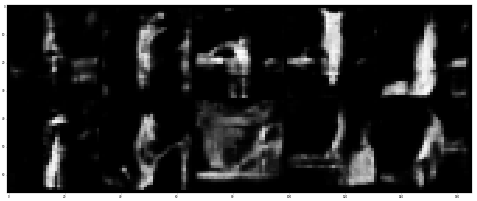

prediction 11 probabitliy max 0.6538594365119934 gan id 8 batch id 12
prediction 11 probabitliy max 0.6542280912399292 gan id 38 batch id 35
prediction 11 probabitliy max 0.6543372273445129 gan id 11 batch id 21
prediction 11 probabitliy max 0.6552198529243469 gan id 30 batch id 36
prediction 11 probabitliy max 0.6679872274398804 gan id 9 batch id 33
prediction 11 probabitliy max 0.6726855635643005 gan id 29 batch id 33
prediction 11 probabitliy max 0.6746447682380676 gan id 38 batch id 0
prediction 11 probabitliy max 0.6775103807449341 gan id 2 batch id 14
prediction 11 probabitliy max 0.6807830929756165 gan id 31 batch id 38
prediction 11 probabitliy max 0.680934727191925 gan id 34 batch id 7


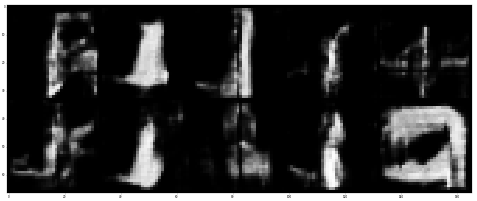

prediction 11 probabitliy max 0.6822006106376648 gan id 21 batch id 35
prediction 11 probabitliy max 0.683331310749054 gan id 39 batch id 1
prediction 11 probabitliy max 0.688256025314331 gan id 32 batch id 35
prediction 11 probabitliy max 0.6890891790390015 gan id 45 batch id 49
prediction 11 probabitliy max 0.68951416015625 gan id 37 batch id 18
prediction 11 probabitliy max 0.6898312568664551 gan id 38 batch id 40
prediction 11 probabitliy max 0.6915589570999146 gan id 30 batch id 20
prediction 11 probabitliy max 0.6936302781105042 gan id 9 batch id 3
prediction 11 probabitliy max 0.693899929523468 gan id 26 batch id 36
prediction 11 probabitliy max 0.6943275332450867 gan id 28 batch id 30


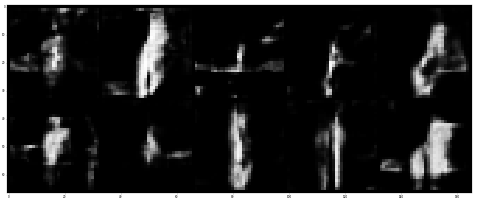

prediction 11 probabitliy max 0.6960347294807434 gan id 8 batch id 43
prediction 11 probabitliy max 0.7020469307899475 gan id 3 batch id 29
prediction 11 probabitliy max 0.7044886350631714 gan id 10 batch id 40
prediction 11 probabitliy max 0.7051792144775391 gan id 41 batch id 0
prediction 11 probabitliy max 0.7063854336738586 gan id 8 batch id 15
prediction 11 probabitliy max 0.7083292007446289 gan id 9 batch id 35
prediction 11 probabitliy max 0.7093561291694641 gan id 0 batch id 1
prediction 11 probabitliy max 0.7099970579147339 gan id 47 batch id 26
prediction 11 probabitliy max 0.7107720375061035 gan id 40 batch id 41
prediction 11 probabitliy max 0.7117260694503784 gan id 9 batch id 25


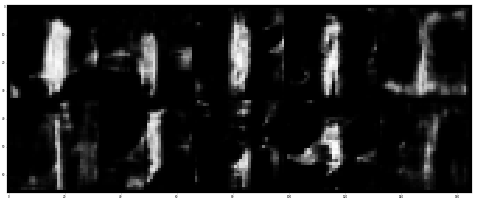

prediction 11 probabitliy max 0.7141363620758057 gan id 36 batch id 21
prediction 11 probabitliy max 0.7144075036048889 gan id 17 batch id 0
prediction 11 probabitliy max 0.7162213921546936 gan id 30 batch id 13
prediction 11 probabitliy max 0.7187884449958801 gan id 17 batch id 44
prediction 11 probabitliy max 0.722112774848938 gan id 38 batch id 2
prediction 11 probabitliy max 0.7271676063537598 gan id 29 batch id 21
prediction 11 probabitliy max 0.729080319404602 gan id 44 batch id 47
prediction 11 probabitliy max 0.7295612692832947 gan id 8 batch id 49
prediction 11 probabitliy max 0.7304053902626038 gan id 31 batch id 15
prediction 11 probabitliy max 0.7307000756263733 gan id 49 batch id 23


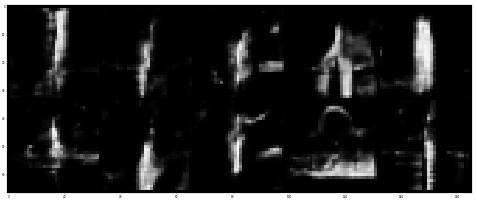

prediction 11 probabitliy max 0.7310917973518372 gan id 7 batch id 10
prediction 11 probabitliy max 0.7317565679550171 gan id 37 batch id 49
prediction 11 probabitliy max 0.734184980392456 gan id 38 batch id 31
prediction 11 probabitliy max 0.735144853591919 gan id 34 batch id 40
prediction 11 probabitliy max 0.7379524111747742 gan id 1 batch id 48
prediction 11 probabitliy max 0.7431011199951172 gan id 40 batch id 27
prediction 11 probabitliy max 0.7439870834350586 gan id 31 batch id 28
prediction 11 probabitliy max 0.7458832859992981 gan id 37 batch id 15
prediction 11 probabitliy max 0.7493050694465637 gan id 44 batch id 45
prediction 11 probabitliy max 0.7504739761352539 gan id 9 batch id 30


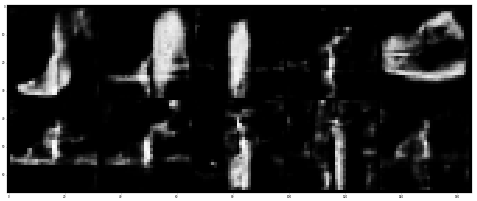

prediction 11 probabitliy max 0.758881688117981 gan id 25 batch id 20
prediction 11 probabitliy max 0.7608658075332642 gan id 28 batch id 15
prediction 11 probabitliy max 0.7631429433822632 gan id 41 batch id 30
prediction 11 probabitliy max 0.7641253471374512 gan id 31 batch id 2
prediction 11 probabitliy max 0.76433926820755 gan id 45 batch id 39
prediction 11 probabitliy max 0.7654422521591187 gan id 36 batch id 40
prediction 11 probabitliy max 0.7664432525634766 gan id 41 batch id 17
prediction 11 probabitliy max 0.7667810916900635 gan id 32 batch id 43
prediction 11 probabitliy max 0.7672510743141174 gan id 38 batch id 23
prediction 11 probabitliy max 0.7673494219779968 gan id 9 batch id 42


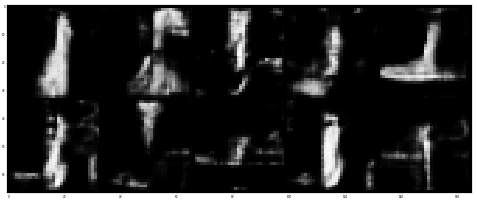

prediction 11 probabitliy max 0.7727146744728088 gan id 28 batch id 38
prediction 11 probabitliy max 0.7729063034057617 gan id 46 batch id 20
prediction 11 probabitliy max 0.7765927910804749 gan id 9 batch id 9
prediction 11 probabitliy max 0.7784343361854553 gan id 33 batch id 1
prediction 11 probabitliy max 0.7798591256141663 gan id 41 batch id 7
prediction 11 probabitliy max 0.7805852890014648 gan id 30 batch id 40
prediction 11 probabitliy max 0.7813628911972046 gan id 9 batch id 31
prediction 11 probabitliy max 0.7839375734329224 gan id 31 batch id 3
prediction 11 probabitliy max 0.7845239043235779 gan id 34 batch id 9
prediction 11 probabitliy max 0.7928124070167542 gan id 41 batch id 14


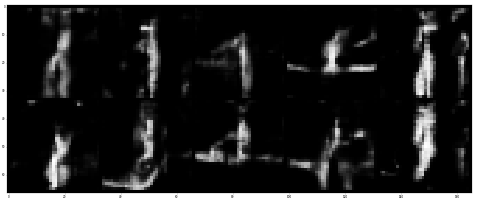

prediction 11 probabitliy max 0.7989607453346252 gan id 9 batch id 24
prediction 11 probabitliy max 0.7992808818817139 gan id 30 batch id 21
prediction 11 probabitliy max 0.7996589541435242 gan id 10 batch id 14
prediction 11 probabitliy max 0.8004364967346191 gan id 36 batch id 12
prediction 11 probabitliy max 0.8008770942687988 gan id 26 batch id 45
prediction 11 probabitliy max 0.8011375665664673 gan id 34 batch id 20
prediction 11 probabitliy max 0.801696240901947 gan id 13 batch id 44
prediction 11 probabitliy max 0.8020032644271851 gan id 10 batch id 31
prediction 11 probabitliy max 0.8023685812950134 gan id 9 batch id 41
prediction 11 probabitliy max 0.8036934733390808 gan id 45 batch id 40


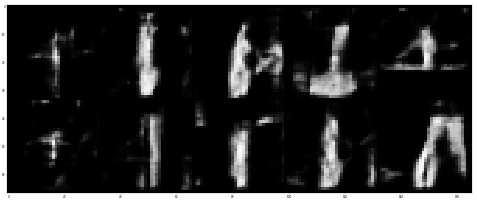

prediction 11 probabitliy max 0.8069764375686646 gan id 49 batch id 24
prediction 11 probabitliy max 0.8088020086288452 gan id 9 batch id 9
prediction 11 probabitliy max 0.8094231486320496 gan id 21 batch id 39
prediction 11 probabitliy max 0.8099601864814758 gan id 25 batch id 39
prediction 11 probabitliy max 0.815479040145874 gan id 31 batch id 41
prediction 11 probabitliy max 0.8171373009681702 gan id 45 batch id 49
prediction 11 probabitliy max 0.8186278343200684 gan id 45 batch id 44
prediction 11 probabitliy max 0.8195417523384094 gan id 39 batch id 14
prediction 11 probabitliy max 0.819555401802063 gan id 47 batch id 40
prediction 11 probabitliy max 0.8200995922088623 gan id 9 batch id 12


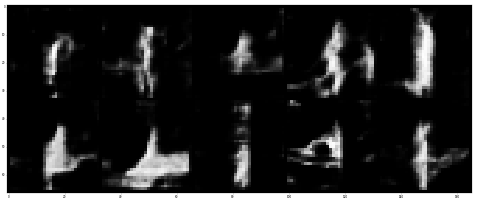

prediction 11 probabitliy max 0.8301909565925598 gan id 49 batch id 38
prediction 11 probabitliy max 0.8382068872451782 gan id 8 batch id 43
prediction 11 probabitliy max 0.8402453660964966 gan id 10 batch id 35
prediction 11 probabitliy max 0.8408999443054199 gan id 45 batch id 39
prediction 11 probabitliy max 0.8440127968788147 gan id 48 batch id 0
prediction 11 probabitliy max 0.8456156849861145 gan id 35 batch id 18
prediction 11 probabitliy max 0.8461045622825623 gan id 49 batch id 3
prediction 11 probabitliy max 0.8466380834579468 gan id 9 batch id 48
prediction 11 probabitliy max 0.8511156439781189 gan id 34 batch id 33
prediction 11 probabitliy max 0.8529260754585266 gan id 46 batch id 15


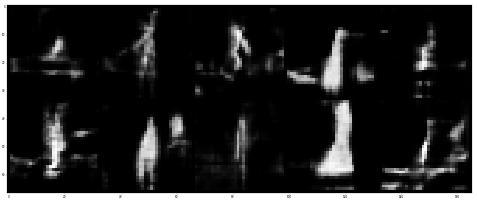

prediction 11 probabitliy max 0.8587745428085327 gan id 31 batch id 13
prediction 11 probabitliy max 0.8630833625793457 gan id 30 batch id 32
prediction 11 probabitliy max 0.863509476184845 gan id 47 batch id 24
prediction 11 probabitliy max 0.8636090755462646 gan id 29 batch id 8
prediction 11 probabitliy max 0.8643835783004761 gan id 30 batch id 24
prediction 11 probabitliy max 0.8698903918266296 gan id 35 batch id 34
prediction 11 probabitliy max 0.8713683485984802 gan id 42 batch id 45
prediction 11 probabitliy max 0.8809958100318909 gan id 7 batch id 24
prediction 11 probabitliy max 0.8914377093315125 gan id 41 batch id 23
prediction 11 probabitliy max 0.9053489565849304 gan id 21 batch id 35


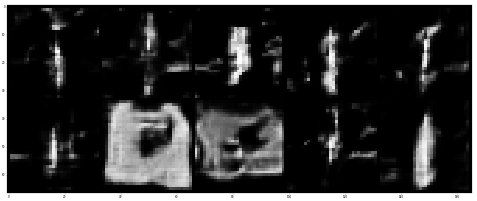

prediction 11 probabitliy max 0.9085673689842224 gan id 38 batch id 19
prediction 11 probabitliy max 0.9090007543563843 gan id 41 batch id 8
prediction 11 probabitliy max 0.9114434719085693 gan id 30 batch id 0
prediction 11 probabitliy max 0.9117850661277771 gan id 23 batch id 32
prediction 11 probabitliy max 0.915607750415802 gan id 39 batch id 6
prediction 11 probabitliy max 0.9227836728096008 gan id 10 batch id 10
prediction 11 probabitliy max 0.9279909133911133 gan id 42 batch id 43
prediction 11 probabitliy max 0.929669976234436 gan id 41 batch id 39
prediction 11 probabitliy max 0.9322282075881958 gan id 30 batch id 2
prediction 11 probabitliy max 0.9355819225311279 gan id 9 batch id 3


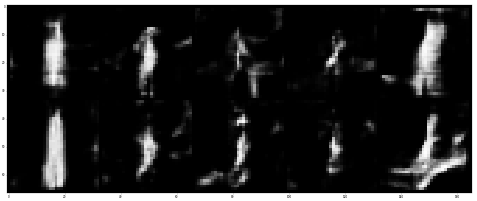

prediction 11 probabitliy max 0.9422394037246704 gan id 9 batch id 26
prediction 11 probabitliy max 0.9440837502479553 gan id 31 batch id 9
prediction 11 probabitliy max 0.9454266428947449 gan id 7 batch id 47
prediction 11 probabitliy max 0.9465407729148865 gan id 9 batch id 21
prediction 11 probabitliy max 0.9487450122833252 gan id 45 batch id 14
prediction 11 probabitliy max 0.9493107199668884 gan id 44 batch id 8
prediction 11 probabitliy max 0.9555206894874573 gan id 40 batch id 33
prediction 11 probabitliy max 0.9568073153495789 gan id 45 batch id 44
prediction 11 probabitliy max 0.9610534310340881 gan id 38 batch id 19
prediction 11 probabitliy max 0.9618382453918457 gan id 9 batch id 13


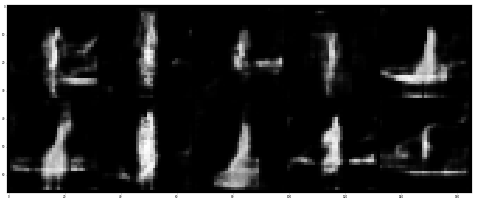

prediction 11 probabitliy max 0.9670773148536682 gan id 49 batch id 48
prediction 11 probabitliy max 0.9678033590316772 gan id 45 batch id 12
prediction 11 probabitliy max 0.9698970913887024 gan id 31 batch id 44
prediction 11 probabitliy max 0.9707984328269958 gan id 38 batch id 6
prediction 11 probabitliy max 0.9732363820075989 gan id 25 batch id 23
prediction 11 probabitliy max 0.9740451574325562 gan id 41 batch id 36
prediction 11 probabitliy max 0.9770838022232056 gan id 10 batch id 46
prediction 11 probabitliy max 0.979104220867157 gan id 36 batch id 42
prediction 11 probabitliy max 0.979950487613678 gan id 45 batch id 18
prediction 11 probabitliy max 0.98138427734375 gan id 31 batch id 5


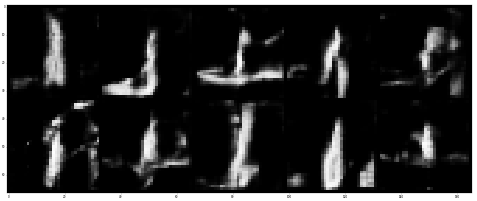

prediction 11 probabitliy max 0.9815957546234131 gan id 9 batch id 46
prediction 11 probabitliy max 0.9832574129104614 gan id 9 batch id 40
prediction 11 probabitliy max 0.9841828942298889 gan id 38 batch id 39
prediction 11 probabitliy max 0.9851735830307007 gan id 31 batch id 36
prediction 11 probabitliy max 0.9881376028060913 gan id 25 batch id 9
prediction 11 probabitliy max 0.9883590340614319 gan id 22 batch id 34
prediction 11 probabitliy max 0.9905917048454285 gan id 31 batch id 41
prediction 11 probabitliy max 0.9920116662979126 gan id 31 batch id 46
prediction 11 probabitliy max 0.9925823211669922 gan id 49 batch id 3
prediction 11 probabitliy max 0.993034839630127 gan id 31 batch id 21


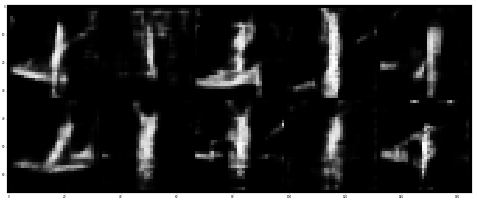

In [66]:
print(len(topdata))
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

299
prediction 11 probabitliy max 0.3345174789428711 gan id 2 batch id 37
prediction 11 probabitliy max 0.3367473781108856 gan id 25 batch id 15
prediction 11 probabitliy max 0.34292110800743103 gan id 36 batch id 20
prediction 11 probabitliy max 0.3436785638332367 gan id 7 batch id 44
prediction 11 probabitliy max 0.3445598781108856 gan id 22 batch id 14
prediction 11 probabitliy max 0.34719306230545044 gan id 32 batch id 16
prediction 11 probabitliy max 0.3478854298591614 gan id 36 batch id 14
prediction 11 probabitliy max 0.34908586740493774 gan id 37 batch id 9
prediction 11 probabitliy max 0.35152581334114075 gan id 2 batch id 7
prediction 11 probabitliy max 0.35167452692985535 gan id 34 batch id 17


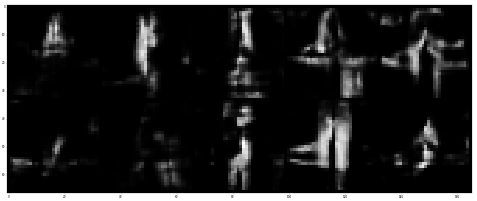

prediction 11 probabitliy max 0.35179510712623596 gan id 45 batch id 9
prediction 11 probabitliy max 0.35375717282295227 gan id 5 batch id 25
prediction 11 probabitliy max 0.358844518661499 gan id 23 batch id 7
prediction 11 probabitliy max 0.3593578636646271 gan id 16 batch id 10
prediction 11 probabitliy max 0.3623312711715698 gan id 45 batch id 21
prediction 11 probabitliy max 0.36673611402511597 gan id 9 batch id 13
prediction 11 probabitliy max 0.367059588432312 gan id 40 batch id 5
prediction 11 probabitliy max 0.36738720536231995 gan id 17 batch id 9
prediction 11 probabitliy max 0.3700983226299286 gan id 25 batch id 5
prediction 11 probabitliy max 0.3710148334503174 gan id 41 batch id 17


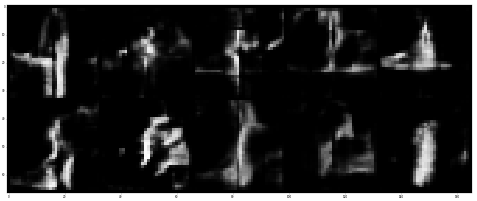

prediction 11 probabitliy max 0.3719433546066284 gan id 39 batch id 28
prediction 11 probabitliy max 0.37374112010002136 gan id 35 batch id 0
prediction 11 probabitliy max 0.3753413259983063 gan id 29 batch id 35
prediction 11 probabitliy max 0.37634387612342834 gan id 40 batch id 29
prediction 11 probabitliy max 0.37902799248695374 gan id 16 batch id 20
prediction 11 probabitliy max 0.38238635659217834 gan id 39 batch id 42
prediction 11 probabitliy max 0.38323113322257996 gan id 11 batch id 22
prediction 11 probabitliy max 0.38417214155197144 gan id 34 batch id 31
prediction 11 probabitliy max 0.38448917865753174 gan id 5 batch id 20
prediction 11 probabitliy max 0.38922086358070374 gan id 6 batch id 49


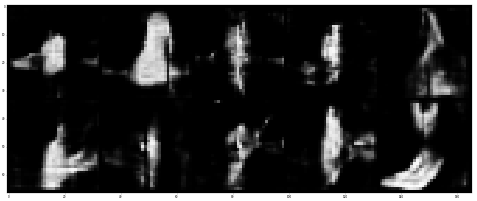

prediction 11 probabitliy max 0.39038702845573425 gan id 10 batch id 49
prediction 11 probabitliy max 0.391972154378891 gan id 39 batch id 30
prediction 11 probabitliy max 0.3922511041164398 gan id 49 batch id 43
prediction 11 probabitliy max 0.3962908983230591 gan id 25 batch id 6
prediction 11 probabitliy max 0.3987244963645935 gan id 41 batch id 10
prediction 11 probabitliy max 0.39879482984542847 gan id 9 batch id 14
prediction 11 probabitliy max 0.4002581238746643 gan id 7 batch id 47
prediction 11 probabitliy max 0.40293753147125244 gan id 10 batch id 11
prediction 11 probabitliy max 0.40599483251571655 gan id 26 batch id 13
prediction 11 probabitliy max 0.40740272402763367 gan id 19 batch id 26


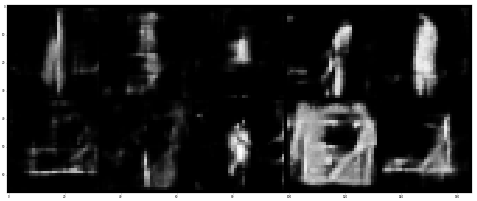

prediction 11 probabitliy max 0.4084332585334778 gan id 26 batch id 1
prediction 11 probabitliy max 0.408742219209671 gan id 44 batch id 26
prediction 11 probabitliy max 0.41591334342956543 gan id 23 batch id 21
prediction 11 probabitliy max 0.4186536371707916 gan id 30 batch id 42
prediction 11 probabitliy max 0.4200255274772644 gan id 8 batch id 41
prediction 11 probabitliy max 0.4235251843929291 gan id 41 batch id 8
prediction 11 probabitliy max 0.4237595200538635 gan id 25 batch id 10
prediction 11 probabitliy max 0.42574718594551086 gan id 21 batch id 0
prediction 11 probabitliy max 0.4260859489440918 gan id 44 batch id 18
prediction 11 probabitliy max 0.42913079261779785 gan id 15 batch id 39


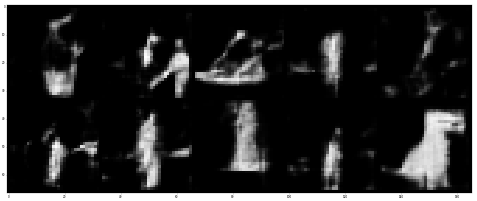

prediction 11 probabitliy max 0.4314628839492798 gan id 37 batch id 23
prediction 11 probabitliy max 0.4330708384513855 gan id 31 batch id 17
prediction 11 probabitliy max 0.4332769811153412 gan id 24 batch id 25
prediction 11 probabitliy max 0.43797561526298523 gan id 48 batch id 23
prediction 11 probabitliy max 0.4434981048107147 gan id 8 batch id 41
prediction 11 probabitliy max 0.44499579071998596 gan id 39 batch id 40
prediction 11 probabitliy max 0.4579409956932068 gan id 20 batch id 10
prediction 11 probabitliy max 0.4594937860965729 gan id 39 batch id 37
prediction 11 probabitliy max 0.4597105085849762 gan id 10 batch id 49
prediction 11 probabitliy max 0.4604283273220062 gan id 2 batch id 7


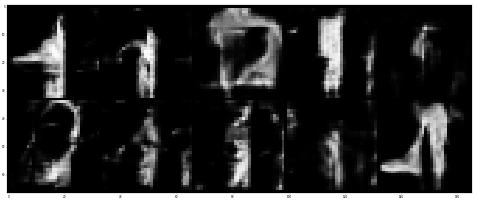

prediction 11 probabitliy max 0.46070897579193115 gan id 20 batch id 16
prediction 11 probabitliy max 0.4615599513053894 gan id 12 batch id 21
prediction 11 probabitliy max 0.4664096236228943 gan id 41 batch id 41
prediction 11 probabitliy max 0.47120729088783264 gan id 31 batch id 44
prediction 11 probabitliy max 0.47652533650398254 gan id 37 batch id 20
prediction 11 probabitliy max 0.4786859452724457 gan id 31 batch id 15
prediction 11 probabitliy max 0.4792482256889343 gan id 25 batch id 48
prediction 11 probabitliy max 0.4815448820590973 gan id 31 batch id 7
prediction 11 probabitliy max 0.48288288712501526 gan id 45 batch id 26
prediction 11 probabitliy max 0.48302382230758667 gan id 39 batch id 16


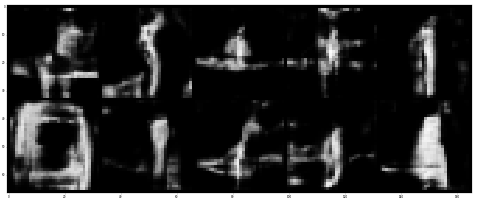

prediction 11 probabitliy max 0.48640361428260803 gan id 31 batch id 30
prediction 11 probabitliy max 0.4876376688480377 gan id 7 batch id 31
prediction 11 probabitliy max 0.4891495704650879 gan id 49 batch id 42
prediction 11 probabitliy max 0.49342674016952515 gan id 24 batch id 22
prediction 11 probabitliy max 0.49489712715148926 gan id 48 batch id 10
prediction 11 probabitliy max 0.49513930082321167 gan id 37 batch id 38
prediction 11 probabitliy max 0.4968174993991852 gan id 11 batch id 0
prediction 11 probabitliy max 0.4986940026283264 gan id 15 batch id 8
prediction 11 probabitliy max 0.5004338622093201 gan id 1 batch id 16
prediction 11 probabitliy max 0.504237174987793 gan id 21 batch id 17


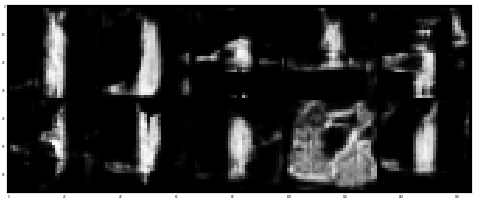

prediction 11 probabitliy max 0.5060204863548279 gan id 35 batch id 42
prediction 11 probabitliy max 0.5061971545219421 gan id 41 batch id 48
prediction 11 probabitliy max 0.5118215084075928 gan id 8 batch id 47
prediction 11 probabitliy max 0.5133919715881348 gan id 47 batch id 20
prediction 11 probabitliy max 0.51362144947052 gan id 4 batch id 44
prediction 11 probabitliy max 0.513713002204895 gan id 33 batch id 45
prediction 11 probabitliy max 0.5156680345535278 gan id 31 batch id 31
prediction 11 probabitliy max 0.5174417495727539 gan id 31 batch id 24
prediction 11 probabitliy max 0.5234193801879883 gan id 32 batch id 31
prediction 11 probabitliy max 0.5250151753425598 gan id 32 batch id 33


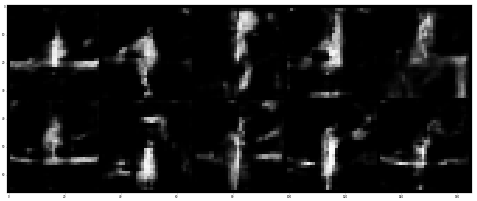

prediction 11 probabitliy max 0.5263577699661255 gan id 41 batch id 34
prediction 11 probabitliy max 0.526741623878479 gan id 47 batch id 31
prediction 11 probabitliy max 0.5287566184997559 gan id 15 batch id 18
prediction 11 probabitliy max 0.5296105146408081 gan id 31 batch id 45
prediction 11 probabitliy max 0.530335009098053 gan id 39 batch id 38
prediction 11 probabitliy max 0.5340995788574219 gan id 31 batch id 32
prediction 11 probabitliy max 0.5345714092254639 gan id 31 batch id 49
prediction 11 probabitliy max 0.5345918536186218 gan id 41 batch id 6
prediction 11 probabitliy max 0.5374675989151001 gan id 8 batch id 43
prediction 11 probabitliy max 0.5387985706329346 gan id 16 batch id 15


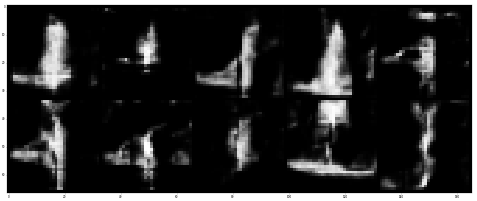

prediction 11 probabitliy max 0.5428476333618164 gan id 30 batch id 39
prediction 11 probabitliy max 0.5514425039291382 gan id 39 batch id 43
prediction 11 probabitliy max 0.5534888505935669 gan id 32 batch id 43
prediction 11 probabitliy max 0.5548614263534546 gan id 34 batch id 45
prediction 11 probabitliy max 0.5593294501304626 gan id 9 batch id 11
prediction 11 probabitliy max 0.5630020499229431 gan id 37 batch id 18
prediction 11 probabitliy max 0.5679177045822144 gan id 3 batch id 18
prediction 11 probabitliy max 0.5711238384246826 gan id 13 batch id 23
prediction 11 probabitliy max 0.5739059448242188 gan id 0 batch id 31
prediction 11 probabitliy max 0.57711261510849 gan id 11 batch id 11


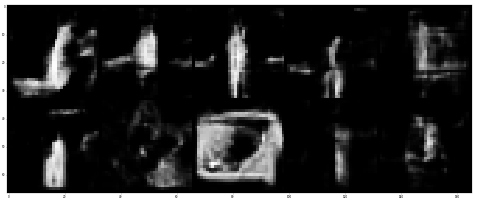

prediction 11 probabitliy max 0.5779508948326111 gan id 38 batch id 10
prediction 11 probabitliy max 0.5787001252174377 gan id 41 batch id 0
prediction 11 probabitliy max 0.5794409513473511 gan id 19 batch id 13
prediction 11 probabitliy max 0.5817973017692566 gan id 11 batch id 32
prediction 11 probabitliy max 0.5820229053497314 gan id 34 batch id 22
prediction 11 probabitliy max 0.5824213027954102 gan id 23 batch id 31
prediction 11 probabitliy max 0.5837834477424622 gan id 31 batch id 15
prediction 11 probabitliy max 0.5849807858467102 gan id 1 batch id 8
prediction 11 probabitliy max 0.5893713235855103 gan id 0 batch id 43
prediction 11 probabitliy max 0.5942955017089844 gan id 47 batch id 19


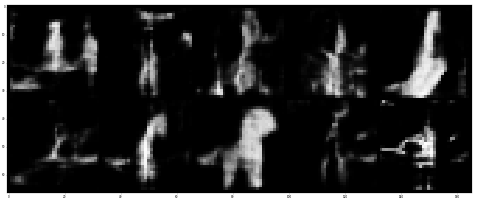

prediction 11 probabitliy max 0.6011890769004822 gan id 31 batch id 21
prediction 11 probabitliy max 0.6038658618927002 gan id 30 batch id 24
prediction 11 probabitliy max 0.6073079705238342 gan id 31 batch id 47
prediction 11 probabitliy max 0.6134941577911377 gan id 7 batch id 19
prediction 11 probabitliy max 0.6150330901145935 gan id 47 batch id 48
prediction 11 probabitliy max 0.6175550818443298 gan id 41 batch id 31
prediction 11 probabitliy max 0.6184998750686646 gan id 40 batch id 46
prediction 11 probabitliy max 0.6191198229789734 gan id 34 batch id 43
prediction 11 probabitliy max 0.6209535002708435 gan id 16 batch id 30
prediction 11 probabitliy max 0.6213853359222412 gan id 13 batch id 9


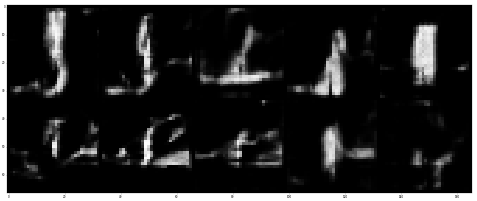

prediction 11 probabitliy max 0.6244524717330933 gan id 7 batch id 13
prediction 11 probabitliy max 0.6270639300346375 gan id 21 batch id 41
prediction 11 probabitliy max 0.6286947727203369 gan id 31 batch id 27
prediction 11 probabitliy max 0.632339596748352 gan id 31 batch id 22
prediction 11 probabitliy max 0.6434841752052307 gan id 24 batch id 1
prediction 11 probabitliy max 0.6435111165046692 gan id 41 batch id 34
prediction 11 probabitliy max 0.6455386281013489 gan id 8 batch id 44
prediction 11 probabitliy max 0.6492829322814941 gan id 17 batch id 24
prediction 11 probabitliy max 0.6498200297355652 gan id 8 batch id 22
prediction 11 probabitliy max 0.6528842449188232 gan id 9 batch id 48


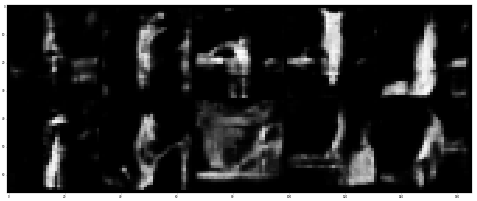

prediction 11 probabitliy max 0.6538606882095337 gan id 8 batch id 12
prediction 11 probabitliy max 0.6542293429374695 gan id 38 batch id 35
prediction 11 probabitliy max 0.6543366312980652 gan id 11 batch id 21
prediction 11 probabitliy max 0.6552208662033081 gan id 30 batch id 36
prediction 11 probabitliy max 0.6679868698120117 gan id 9 batch id 33
prediction 11 probabitliy max 0.6726855635643005 gan id 29 batch id 33
prediction 11 probabitliy max 0.6746447682380676 gan id 38 batch id 0
prediction 11 probabitliy max 0.6775100231170654 gan id 2 batch id 14
prediction 11 probabitliy max 0.6807824969291687 gan id 31 batch id 38
prediction 11 probabitliy max 0.680934727191925 gan id 34 batch id 7


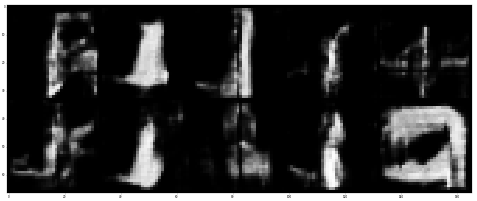

prediction 11 probabitliy max 0.6822009086608887 gan id 21 batch id 35
prediction 11 probabitliy max 0.683331310749054 gan id 39 batch id 1
prediction 11 probabitliy max 0.6882563829421997 gan id 32 batch id 35
prediction 11 probabitliy max 0.6890885233879089 gan id 45 batch id 49
prediction 11 probabitliy max 0.68951416015625 gan id 37 batch id 18
prediction 11 probabitliy max 0.6898301839828491 gan id 38 batch id 40
prediction 11 probabitliy max 0.691558301448822 gan id 30 batch id 20
prediction 11 probabitliy max 0.6936296820640564 gan id 9 batch id 3
prediction 11 probabitliy max 0.6939002275466919 gan id 26 batch id 36
prediction 11 probabitliy max 0.6943275332450867 gan id 28 batch id 30


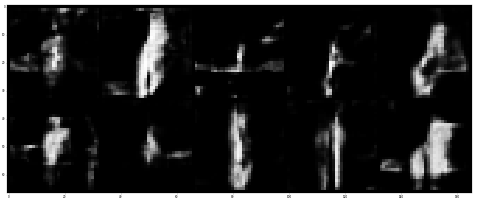

prediction 11 probabitliy max 0.6960350275039673 gan id 8 batch id 43
prediction 11 probabitliy max 0.7020469307899475 gan id 3 batch id 29
prediction 11 probabitliy max 0.7044888734817505 gan id 10 batch id 40
prediction 11 probabitliy max 0.7051792144775391 gan id 41 batch id 0
prediction 11 probabitliy max 0.7063847184181213 gan id 8 batch id 15
prediction 11 probabitliy max 0.7083292007446289 gan id 9 batch id 35
prediction 11 probabitliy max 0.709356427192688 gan id 0 batch id 1
prediction 11 probabitliy max 0.7099980711936951 gan id 47 batch id 26
prediction 11 probabitliy max 0.710771381855011 gan id 40 batch id 41
prediction 11 probabitliy max 0.7117271423339844 gan id 9 batch id 25


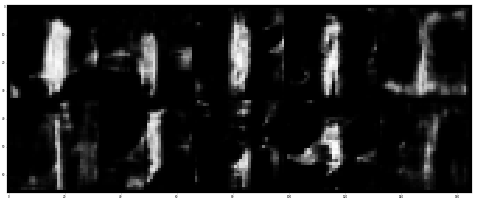

prediction 11 probabitliy max 0.714137077331543 gan id 36 batch id 21
prediction 11 probabitliy max 0.7144071459770203 gan id 17 batch id 0
prediction 11 probabitliy max 0.7162216901779175 gan id 30 batch id 13
prediction 11 probabitliy max 0.7187884449958801 gan id 17 batch id 44
prediction 11 probabitliy max 0.722112774848938 gan id 38 batch id 2
prediction 11 probabitliy max 0.7271676063537598 gan id 29 batch id 21
prediction 11 probabitliy max 0.729080319404602 gan id 44 batch id 47
prediction 11 probabitliy max 0.7295615673065186 gan id 8 batch id 49
prediction 11 probabitliy max 0.7304053902626038 gan id 31 batch id 15
prediction 11 probabitliy max 0.730699360370636 gan id 49 batch id 23


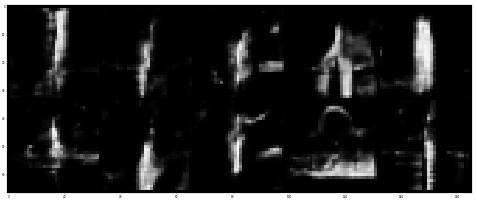

prediction 11 probabitliy max 0.7310911417007446 gan id 7 batch id 10
prediction 11 probabitliy max 0.7317565679550171 gan id 37 batch id 49
prediction 11 probabitliy max 0.7341842651367188 gan id 38 batch id 31
prediction 11 probabitliy max 0.7351441383361816 gan id 34 batch id 40
prediction 11 probabitliy max 0.7379524111747742 gan id 1 batch id 48
prediction 11 probabitliy max 0.7431000471115112 gan id 40 batch id 27
prediction 11 probabitliy max 0.7439870834350586 gan id 31 batch id 28
prediction 11 probabitliy max 0.7458832859992981 gan id 37 batch id 15
prediction 11 probabitliy max 0.7493062019348145 gan id 44 batch id 45
prediction 11 probabitliy max 0.7504732608795166 gan id 9 batch id 30


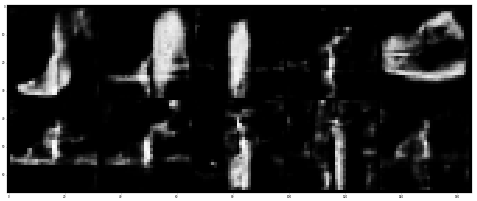

prediction 11 probabitliy max 0.7588809132575989 gan id 25 batch id 20
prediction 11 probabitliy max 0.7608650922775269 gan id 28 batch id 15
prediction 11 probabitliy max 0.7631433010101318 gan id 41 batch id 30
prediction 11 probabitliy max 0.7641253471374512 gan id 31 batch id 2
prediction 11 probabitliy max 0.76433926820755 gan id 45 batch id 39
prediction 11 probabitliy max 0.7654429078102112 gan id 36 batch id 40
prediction 11 probabitliy max 0.7664432525634766 gan id 41 batch id 17
prediction 11 probabitliy max 0.7667810916900635 gan id 32 batch id 43
prediction 11 probabitliy max 0.7672517895698547 gan id 38 batch id 23
prediction 11 probabitliy max 0.7673498392105103 gan id 9 batch id 42


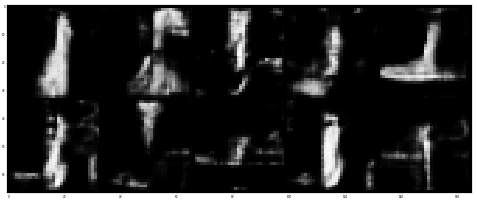

prediction 11 probabitliy max 0.7727138996124268 gan id 28 batch id 38
prediction 11 probabitliy max 0.7729063034057617 gan id 46 batch id 20
prediction 11 probabitliy max 0.7765935659408569 gan id 9 batch id 9
prediction 11 probabitliy max 0.7784335613250732 gan id 33 batch id 1
prediction 11 probabitliy max 0.7798595428466797 gan id 41 batch id 7
prediction 11 probabitliy max 0.7805852890014648 gan id 30 batch id 40
prediction 11 probabitliy max 0.7813625335693359 gan id 9 batch id 31
prediction 11 probabitliy max 0.7839375734329224 gan id 31 batch id 3
prediction 11 probabitliy max 0.7845239043235779 gan id 34 batch id 9
prediction 11 probabitliy max 0.7928131222724915 gan id 41 batch id 14


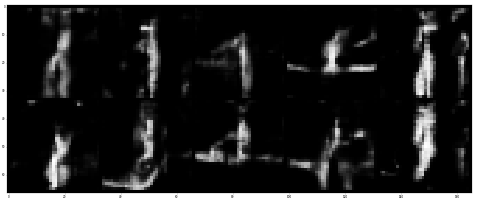

prediction 11 probabitliy max 0.7989600300788879 gan id 9 batch id 24
prediction 11 probabitliy max 0.7992804646492004 gan id 30 batch id 21
prediction 11 probabitliy max 0.7996589541435242 gan id 10 batch id 14
prediction 11 probabitliy max 0.8004357218742371 gan id 36 batch id 12
prediction 11 probabitliy max 0.8008763194084167 gan id 26 batch id 45
prediction 11 probabitliy max 0.8011375665664673 gan id 34 batch id 20
prediction 11 probabitliy max 0.801696240901947 gan id 13 batch id 44
prediction 11 probabitliy max 0.8020029067993164 gan id 10 batch id 31
prediction 11 probabitliy max 0.8023682236671448 gan id 9 batch id 41
prediction 11 probabitliy max 0.8036926984786987 gan id 45 batch id 40


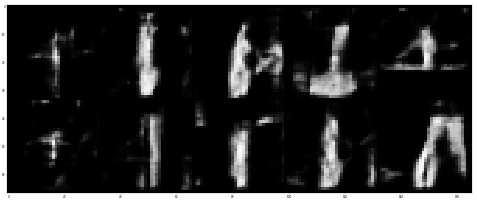

prediction 11 probabitliy max 0.8069767355918884 gan id 49 batch id 24
prediction 11 probabitliy max 0.8088008761405945 gan id 9 batch id 9
prediction 11 probabitliy max 0.8094239234924316 gan id 21 batch id 39
prediction 11 probabitliy max 0.8099606037139893 gan id 25 batch id 39
prediction 11 probabitliy max 0.815479040145874 gan id 31 batch id 41
prediction 11 probabitliy max 0.8171364665031433 gan id 45 batch id 49
prediction 11 probabitliy max 0.8186286091804504 gan id 45 batch id 44
prediction 11 probabitliy max 0.819541335105896 gan id 39 batch id 14
prediction 11 probabitliy max 0.8195550441741943 gan id 47 batch id 40
prediction 11 probabitliy max 0.8200991749763489 gan id 9 batch id 12


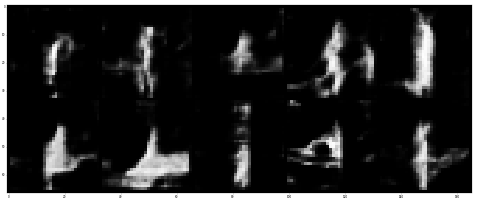

prediction 11 probabitliy max 0.8301913738250732 gan id 49 batch id 38
prediction 11 probabitliy max 0.8382064700126648 gan id 8 batch id 43
prediction 11 probabitliy max 0.8402449488639832 gan id 10 batch id 35
prediction 11 probabitliy max 0.8408991098403931 gan id 45 batch id 39
prediction 11 probabitliy max 0.8440123796463013 gan id 48 batch id 0
prediction 11 probabitliy max 0.8456164598464966 gan id 35 batch id 18
prediction 11 probabitliy max 0.8461045622825623 gan id 49 batch id 3
prediction 11 probabitliy max 0.8466380834579468 gan id 9 batch id 48
prediction 11 probabitliy max 0.8511164784431458 gan id 34 batch id 33
prediction 11 probabitliy max 0.8529260754585266 gan id 46 batch id 15


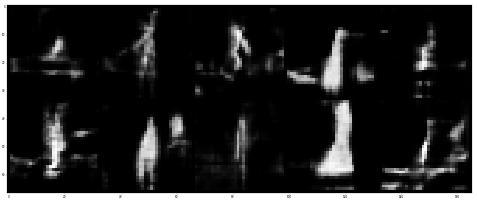

prediction 11 probabitliy max 0.8587737083435059 gan id 31 batch id 13
prediction 11 probabitliy max 0.8630837798118591 gan id 30 batch id 32
prediction 11 probabitliy max 0.863509476184845 gan id 47 batch id 24
prediction 11 probabitliy max 0.8636086583137512 gan id 29 batch id 8
prediction 11 probabitliy max 0.8643835783004761 gan id 30 batch id 24
prediction 11 probabitliy max 0.8698903918266296 gan id 35 batch id 34
prediction 11 probabitliy max 0.8713683485984802 gan id 42 batch id 45
prediction 11 probabitliy max 0.8809958100318909 gan id 7 batch id 24
prediction 11 probabitliy max 0.8914377093315125 gan id 41 batch id 23
prediction 11 probabitliy max 0.9053489565849304 gan id 21 batch id 35


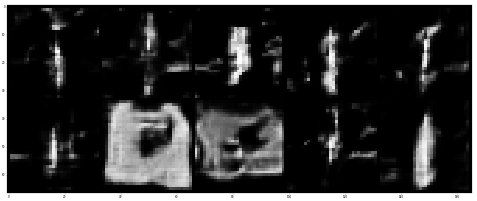

prediction 11 probabitliy max 0.9085682034492493 gan id 38 batch id 19
prediction 11 probabitliy max 0.9090007543563843 gan id 41 batch id 8
prediction 11 probabitliy max 0.9114434719085693 gan id 30 batch id 0
prediction 11 probabitliy max 0.9117850661277771 gan id 23 batch id 32
prediction 11 probabitliy max 0.915607750415802 gan id 39 batch id 6
prediction 11 probabitliy max 0.9227836728096008 gan id 10 batch id 10
prediction 11 probabitliy max 0.9279909133911133 gan id 42 batch id 43
prediction 11 probabitliy max 0.929669976234436 gan id 41 batch id 39
prediction 11 probabitliy max 0.9322282075881958 gan id 30 batch id 2
prediction 11 probabitliy max 0.9355819225311279 gan id 9 batch id 3


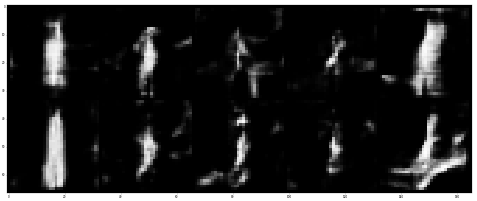

prediction 11 probabitliy max 0.9422394037246704 gan id 9 batch id 26
prediction 11 probabitliy max 0.9440837502479553 gan id 31 batch id 9
prediction 11 probabitliy max 0.9454266428947449 gan id 7 batch id 47
prediction 11 probabitliy max 0.9465412497520447 gan id 9 batch id 21
prediction 11 probabitliy max 0.9487450122833252 gan id 45 batch id 14
prediction 11 probabitliy max 0.9493107199668884 gan id 44 batch id 8
prediction 11 probabitliy max 0.9555206894874573 gan id 40 batch id 33
prediction 11 probabitliy max 0.9568073153495789 gan id 45 batch id 44
prediction 11 probabitliy max 0.9610534310340881 gan id 38 batch id 19
prediction 11 probabitliy max 0.9618373513221741 gan id 9 batch id 13


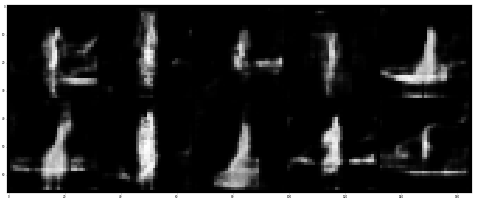

prediction 11 probabitliy max 0.9670773148536682 gan id 49 batch id 48
prediction 11 probabitliy max 0.9678024649620056 gan id 45 batch id 12
prediction 11 probabitliy max 0.9698970913887024 gan id 31 batch id 44
prediction 11 probabitliy max 0.9707984328269958 gan id 38 batch id 6
prediction 11 probabitliy max 0.9732363820075989 gan id 25 batch id 23
prediction 11 probabitliy max 0.9740451574325562 gan id 41 batch id 36
prediction 11 probabitliy max 0.9770838022232056 gan id 10 batch id 46
prediction 11 probabitliy max 0.979104220867157 gan id 36 batch id 42
prediction 11 probabitliy max 0.9799514412879944 gan id 45 batch id 18
prediction 11 probabitliy max 0.98138427734375 gan id 31 batch id 5


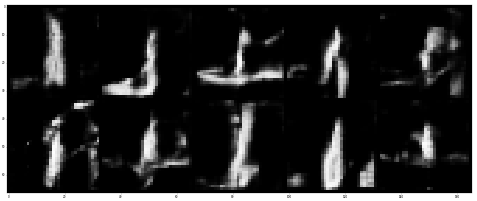

prediction 11 probabitliy max 0.9815957546234131 gan id 9 batch id 46
prediction 11 probabitliy max 0.9832574129104614 gan id 9 batch id 40
prediction 11 probabitliy max 0.9841828942298889 gan id 38 batch id 39
prediction 11 probabitliy max 0.9851735830307007 gan id 31 batch id 36
prediction 11 probabitliy max 0.9881376028060913 gan id 25 batch id 9
prediction 11 probabitliy max 0.9883590340614319 gan id 22 batch id 34
prediction 11 probabitliy max 0.9905917048454285 gan id 31 batch id 41
prediction 11 probabitliy max 0.9920116662979126 gan id 31 batch id 46
prediction 11 probabitliy max 0.9925823211669922 gan id 49 batch id 3
prediction 11 probabitliy max 0.993034839630127 gan id 31 batch id 21


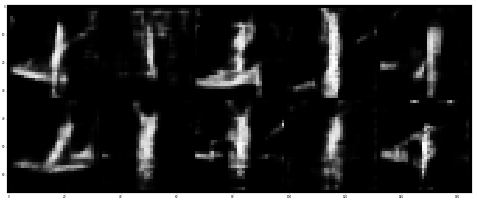

In [25]:
print(len(topdata))
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

In [26]:
topdata = utils.eval_all_from_folder('data/fashion_single_gan300/', model=fmnist_cnn, device=dev1, topk=300, startgan=0, endgan=50, n_batches=50, target=11)
# mgan_data = np.load('data/mgan10/Samples_10gen.npy')

evaluating gan 0
evaluating gan 1
evaluating gan 2
evaluating gan 3
evaluating gan 4
evaluating gan 5
evaluating gan 6
evaluating gan 7
evaluating gan 8
evaluating gan 9
evaluating gan 10
evaluating gan 11
evaluating gan 12
evaluating gan 13
evaluating gan 14
evaluating gan 15
evaluating gan 16
evaluating gan 17
evaluating gan 18
evaluating gan 19
evaluating gan 20
evaluating gan 21
evaluating gan 22
evaluating gan 23
evaluating gan 24
evaluating gan 25
evaluating gan 26
evaluating gan 27
evaluating gan 28
evaluating gan 29
evaluating gan 30
evaluating gan 31
evaluating gan 32
evaluating gan 33
evaluating gan 34
evaluating gan 35
evaluating gan 36
evaluating gan 37
evaluating gan 38
evaluating gan 39
evaluating gan 40
evaluating gan 41
evaluating gan 42
evaluating gan 43
evaluating gan 44
evaluating gan 45
evaluating gan 46
evaluating gan 47
evaluating gan 48
evaluating gan 49


299
prediction 11 probabitliy max 0.5148842334747314 gan id 48 batch id 41
prediction 11 probabitliy max 0.5152273774147034 gan id 41 batch id 25
prediction 11 probabitliy max 0.515385627746582 gan id 34 batch id 37
prediction 11 probabitliy max 0.5187738537788391 gan id 8 batch id 41
prediction 11 probabitliy max 0.5192784667015076 gan id 3 batch id 30
prediction 11 probabitliy max 0.5196879506111145 gan id 26 batch id 14
prediction 11 probabitliy max 0.5222827792167664 gan id 20 batch id 35
prediction 11 probabitliy max 0.5234718322753906 gan id 14 batch id 36
prediction 11 probabitliy max 0.5240444540977478 gan id 28 batch id 4
prediction 11 probabitliy max 0.5247964262962341 gan id 2 batch id 17


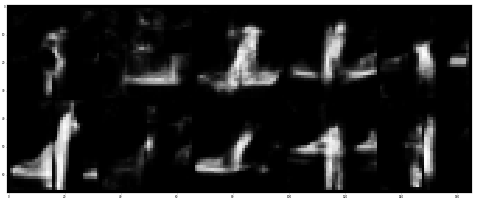

prediction 11 probabitliy max 0.5264892578125 gan id 47 batch id 7
prediction 11 probabitliy max 0.5301039814949036 gan id 5 batch id 6
prediction 11 probabitliy max 0.5315743684768677 gan id 42 batch id 45
prediction 11 probabitliy max 0.5337474942207336 gan id 28 batch id 39
prediction 11 probabitliy max 0.5351874232292175 gan id 27 batch id 47
prediction 11 probabitliy max 0.536526620388031 gan id 37 batch id 33
prediction 11 probabitliy max 0.5395593643188477 gan id 3 batch id 25
prediction 11 probabitliy max 0.5414632558822632 gan id 16 batch id 37
prediction 11 probabitliy max 0.5420292019844055 gan id 48 batch id 14
prediction 11 probabitliy max 0.5420912504196167 gan id 7 batch id 3


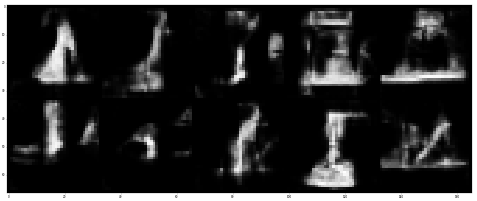

prediction 11 probabitliy max 0.5462278127670288 gan id 42 batch id 26
prediction 11 probabitliy max 0.5472494959831238 gan id 1 batch id 36
prediction 11 probabitliy max 0.5515587329864502 gan id 17 batch id 42
prediction 11 probabitliy max 0.5525938272476196 gan id 32 batch id 30
prediction 11 probabitliy max 0.5530770421028137 gan id 47 batch id 32
prediction 11 probabitliy max 0.562006413936615 gan id 38 batch id 2
prediction 11 probabitliy max 0.5623482465744019 gan id 20 batch id 2
prediction 11 probabitliy max 0.5635250210762024 gan id 0 batch id 26
prediction 11 probabitliy max 0.5637211799621582 gan id 16 batch id 34
prediction 11 probabitliy max 0.56911700963974 gan id 18 batch id 9


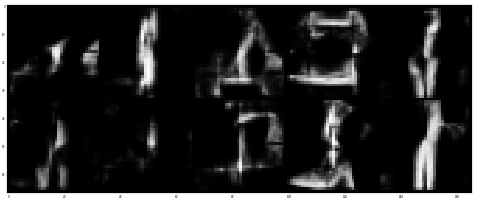

prediction 11 probabitliy max 0.569128155708313 gan id 31 batch id 15
prediction 11 probabitliy max 0.5713019371032715 gan id 41 batch id 20
prediction 11 probabitliy max 0.5760565400123596 gan id 1 batch id 20
prediction 11 probabitliy max 0.5771824717521667 gan id 38 batch id 21
prediction 11 probabitliy max 0.5781757831573486 gan id 43 batch id 22
prediction 11 probabitliy max 0.5782397985458374 gan id 46 batch id 8
prediction 11 probabitliy max 0.5786554217338562 gan id 24 batch id 35
prediction 11 probabitliy max 0.5787150263786316 gan id 48 batch id 26
prediction 11 probabitliy max 0.58274245262146 gan id 37 batch id 3
prediction 11 probabitliy max 0.5835999846458435 gan id 14 batch id 26


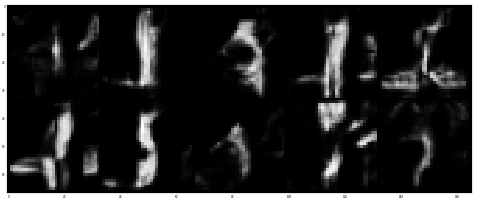

prediction 11 probabitliy max 0.5871527194976807 gan id 1 batch id 2
prediction 11 probabitliy max 0.5887510776519775 gan id 48 batch id 28
prediction 11 probabitliy max 0.5901420712471008 gan id 33 batch id 37
prediction 11 probabitliy max 0.5913400650024414 gan id 19 batch id 25
prediction 11 probabitliy max 0.5935059785842896 gan id 26 batch id 0
prediction 11 probabitliy max 0.5976422429084778 gan id 38 batch id 48
prediction 11 probabitliy max 0.5981408953666687 gan id 4 batch id 25
prediction 11 probabitliy max 0.6043164134025574 gan id 19 batch id 1
prediction 11 probabitliy max 0.6082051992416382 gan id 43 batch id 47
prediction 11 probabitliy max 0.6088969707489014 gan id 23 batch id 10


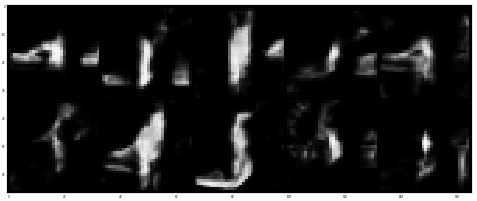

prediction 11 probabitliy max 0.6114673018455505 gan id 19 batch id 37
prediction 11 probabitliy max 0.6118695139884949 gan id 43 batch id 30
prediction 11 probabitliy max 0.611877977848053 gan id 45 batch id 40
prediction 11 probabitliy max 0.6119363307952881 gan id 17 batch id 23
prediction 11 probabitliy max 0.6147257685661316 gan id 34 batch id 34
prediction 11 probabitliy max 0.6155007481575012 gan id 3 batch id 35
prediction 11 probabitliy max 0.618105411529541 gan id 39 batch id 34
prediction 11 probabitliy max 0.6185957193374634 gan id 17 batch id 30
prediction 11 probabitliy max 0.620147168636322 gan id 14 batch id 38
prediction 11 probabitliy max 0.6269688606262207 gan id 2 batch id 34


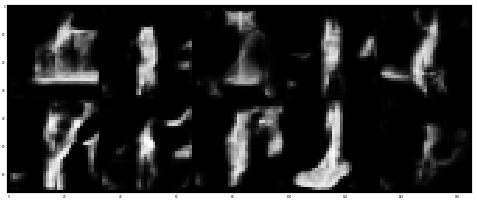

prediction 11 probabitliy max 0.6282162070274353 gan id 49 batch id 13
prediction 11 probabitliy max 0.6327931880950928 gan id 10 batch id 25
prediction 11 probabitliy max 0.6342247724533081 gan id 32 batch id 0
prediction 11 probabitliy max 0.6356786489486694 gan id 7 batch id 24
prediction 11 probabitliy max 0.6377130746841431 gan id 31 batch id 0
prediction 11 probabitliy max 0.6448755860328674 gan id 12 batch id 6
prediction 11 probabitliy max 0.6478294134140015 gan id 39 batch id 15
prediction 11 probabitliy max 0.6479925513267517 gan id 28 batch id 30
prediction 11 probabitliy max 0.6482076644897461 gan id 18 batch id 19
prediction 11 probabitliy max 0.6485174298286438 gan id 49 batch id 45


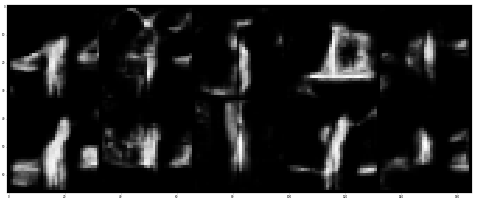

prediction 11 probabitliy max 0.6498748660087585 gan id 44 batch id 25
prediction 11 probabitliy max 0.6507614254951477 gan id 23 batch id 44
prediction 11 probabitliy max 0.651675283908844 gan id 46 batch id 8
prediction 11 probabitliy max 0.6555721163749695 gan id 8 batch id 20
prediction 11 probabitliy max 0.6588299870491028 gan id 21 batch id 16
prediction 11 probabitliy max 0.6607648730278015 gan id 30 batch id 29
prediction 11 probabitliy max 0.6693927049636841 gan id 33 batch id 37
prediction 11 probabitliy max 0.6773636937141418 gan id 11 batch id 1
prediction 11 probabitliy max 0.6794097423553467 gan id 38 batch id 39
prediction 11 probabitliy max 0.6806798577308655 gan id 14 batch id 41


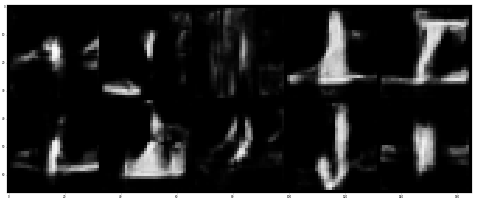

prediction 11 probabitliy max 0.6822412610054016 gan id 30 batch id 32
prediction 11 probabitliy max 0.6834215521812439 gan id 19 batch id 25
prediction 11 probabitliy max 0.6835232377052307 gan id 46 batch id 32
prediction 11 probabitliy max 0.6839421987533569 gan id 43 batch id 46
prediction 11 probabitliy max 0.6876682043075562 gan id 14 batch id 13
prediction 11 probabitliy max 0.6911047101020813 gan id 36 batch id 14
prediction 11 probabitliy max 0.6930404901504517 gan id 45 batch id 8
prediction 11 probabitliy max 0.6974210739135742 gan id 16 batch id 41
prediction 11 probabitliy max 0.700124979019165 gan id 47 batch id 40
prediction 11 probabitliy max 0.7014392614364624 gan id 36 batch id 22


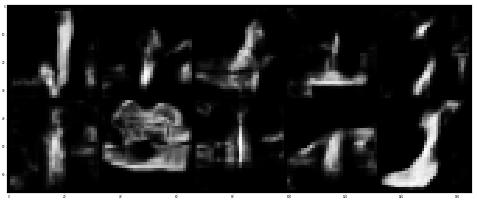

prediction 11 probabitliy max 0.7045466899871826 gan id 3 batch id 17
prediction 11 probabitliy max 0.7052895426750183 gan id 16 batch id 0
prediction 11 probabitliy max 0.7096798419952393 gan id 12 batch id 17
prediction 11 probabitliy max 0.7113050818443298 gan id 37 batch id 43
prediction 11 probabitliy max 0.7119501233100891 gan id 28 batch id 39
prediction 11 probabitliy max 0.7130447626113892 gan id 17 batch id 3
prediction 11 probabitliy max 0.7152868509292603 gan id 19 batch id 30
prediction 11 probabitliy max 0.7157645225524902 gan id 36 batch id 25
prediction 11 probabitliy max 0.716054379940033 gan id 26 batch id 45
prediction 11 probabitliy max 0.7180043458938599 gan id 16 batch id 26


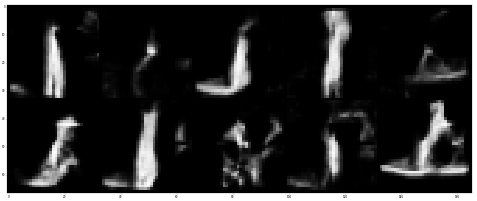

prediction 11 probabitliy max 0.7200669646263123 gan id 30 batch id 43
prediction 11 probabitliy max 0.7210468649864197 gan id 39 batch id 18
prediction 11 probabitliy max 0.7231913208961487 gan id 15 batch id 20
prediction 11 probabitliy max 0.7271859645843506 gan id 43 batch id 27
prediction 11 probabitliy max 0.7285253405570984 gan id 18 batch id 1
prediction 11 probabitliy max 0.7285819053649902 gan id 22 batch id 21
prediction 11 probabitliy max 0.7320870757102966 gan id 49 batch id 5
prediction 11 probabitliy max 0.7330557703971863 gan id 23 batch id 45
prediction 11 probabitliy max 0.733340322971344 gan id 41 batch id 22
prediction 11 probabitliy max 0.7339791059494019 gan id 23 batch id 12


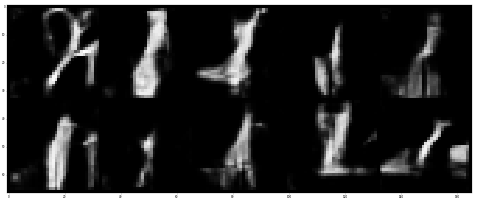

prediction 11 probabitliy max 0.7403042912483215 gan id 16 batch id 42
prediction 11 probabitliy max 0.7412272691726685 gan id 22 batch id 6
prediction 11 probabitliy max 0.7421347498893738 gan id 6 batch id 43
prediction 11 probabitliy max 0.7423357367515564 gan id 28 batch id 47
prediction 11 probabitliy max 0.7434051632881165 gan id 2 batch id 14
prediction 11 probabitliy max 0.7461891174316406 gan id 3 batch id 30
prediction 11 probabitliy max 0.7491425275802612 gan id 25 batch id 17
prediction 11 probabitliy max 0.7526242136955261 gan id 16 batch id 26
prediction 11 probabitliy max 0.7532884478569031 gan id 35 batch id 46
prediction 11 probabitliy max 0.7568160891532898 gan id 21 batch id 11


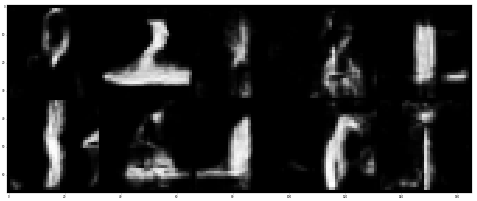

prediction 11 probabitliy max 0.7590444684028625 gan id 23 batch id 28
prediction 11 probabitliy max 0.7641880512237549 gan id 46 batch id 37
prediction 11 probabitliy max 0.7649288177490234 gan id 3 batch id 9
prediction 11 probabitliy max 0.7650086879730225 gan id 15 batch id 47
prediction 11 probabitliy max 0.7672722935676575 gan id 15 batch id 8
prediction 11 probabitliy max 0.7679523825645447 gan id 2 batch id 4
prediction 11 probabitliy max 0.7682332396507263 gan id 49 batch id 19
prediction 11 probabitliy max 0.770366370677948 gan id 46 batch id 20
prediction 11 probabitliy max 0.770784854888916 gan id 2 batch id 15
prediction 11 probabitliy max 0.776606559753418 gan id 5 batch id 40


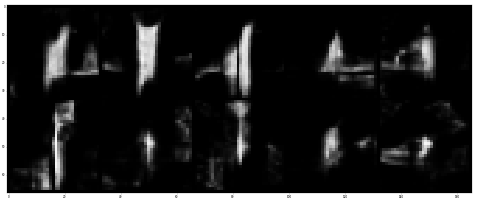

prediction 11 probabitliy max 0.7767024636268616 gan id 14 batch id 15
prediction 11 probabitliy max 0.7773656845092773 gan id 13 batch id 40
prediction 11 probabitliy max 0.7779746055603027 gan id 32 batch id 17
prediction 11 probabitliy max 0.7793899774551392 gan id 9 batch id 21
prediction 11 probabitliy max 0.7832097411155701 gan id 34 batch id 17
prediction 11 probabitliy max 0.7878014445304871 gan id 31 batch id 45
prediction 11 probabitliy max 0.78985595703125 gan id 10 batch id 9
prediction 11 probabitliy max 0.7934473752975464 gan id 42 batch id 47
prediction 11 probabitliy max 0.7940930724143982 gan id 29 batch id 14
prediction 11 probabitliy max 0.7943206429481506 gan id 20 batch id 38


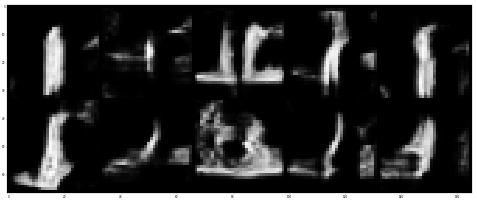

prediction 11 probabitliy max 0.7950175404548645 gan id 36 batch id 24
prediction 11 probabitliy max 0.7966033816337585 gan id 43 batch id 45
prediction 11 probabitliy max 0.7977148294448853 gan id 43 batch id 17
prediction 11 probabitliy max 0.797874927520752 gan id 5 batch id 21
prediction 11 probabitliy max 0.7993547320365906 gan id 34 batch id 45
prediction 11 probabitliy max 0.7998969554901123 gan id 15 batch id 44
prediction 11 probabitliy max 0.8019111156463623 gan id 25 batch id 41
prediction 11 probabitliy max 0.8028385639190674 gan id 41 batch id 34
prediction 11 probabitliy max 0.8032345175743103 gan id 11 batch id 37
prediction 11 probabitliy max 0.8069436550140381 gan id 48 batch id 13


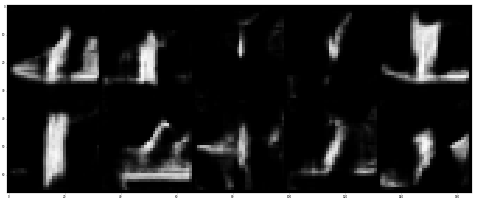

prediction 11 probabitliy max 0.8083617091178894 gan id 30 batch id 41
prediction 11 probabitliy max 0.809794545173645 gan id 23 batch id 3
prediction 11 probabitliy max 0.81142258644104 gan id 49 batch id 43
prediction 11 probabitliy max 0.8223352432250977 gan id 4 batch id 19
prediction 11 probabitliy max 0.8231445550918579 gan id 18 batch id 12
prediction 11 probabitliy max 0.8242796063423157 gan id 1 batch id 29
prediction 11 probabitliy max 0.8244694471359253 gan id 20 batch id 14
prediction 11 probabitliy max 0.8251542448997498 gan id 5 batch id 17
prediction 11 probabitliy max 0.8265274167060852 gan id 1 batch id 46
prediction 11 probabitliy max 0.8271960616111755 gan id 45 batch id 11


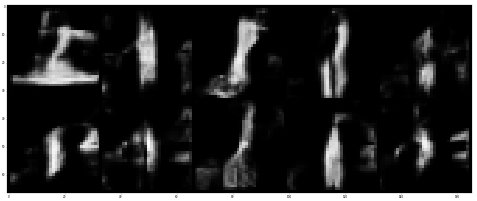

prediction 11 probabitliy max 0.8304011821746826 gan id 30 batch id 14
prediction 11 probabitliy max 0.8307204246520996 gan id 34 batch id 9
prediction 11 probabitliy max 0.8337426781654358 gan id 2 batch id 21
prediction 11 probabitliy max 0.8359301090240479 gan id 18 batch id 25
prediction 11 probabitliy max 0.8365083336830139 gan id 16 batch id 14
prediction 11 probabitliy max 0.8370609283447266 gan id 29 batch id 47
prediction 11 probabitliy max 0.8375664353370667 gan id 25 batch id 46
prediction 11 probabitliy max 0.8385406732559204 gan id 9 batch id 14
prediction 11 probabitliy max 0.8386082649230957 gan id 15 batch id 32
prediction 11 probabitliy max 0.8389078378677368 gan id 10 batch id 6


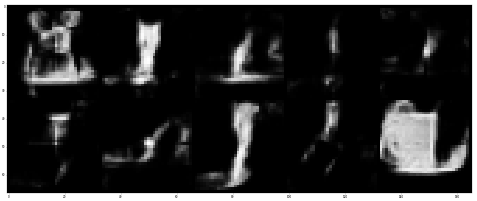

prediction 11 probabitliy max 0.8424431085586548 gan id 43 batch id 21
prediction 11 probabitliy max 0.844294548034668 gan id 2 batch id 41
prediction 11 probabitliy max 0.8475161790847778 gan id 37 batch id 21
prediction 11 probabitliy max 0.8488937616348267 gan id 48 batch id 11
prediction 11 probabitliy max 0.8520097732543945 gan id 34 batch id 40
prediction 11 probabitliy max 0.8522722721099854 gan id 1 batch id 36
prediction 11 probabitliy max 0.8536083102226257 gan id 35 batch id 18
prediction 11 probabitliy max 0.8555761575698853 gan id 35 batch id 39
prediction 11 probabitliy max 0.857966959476471 gan id 14 batch id 13
prediction 11 probabitliy max 0.858529269695282 gan id 16 batch id 46


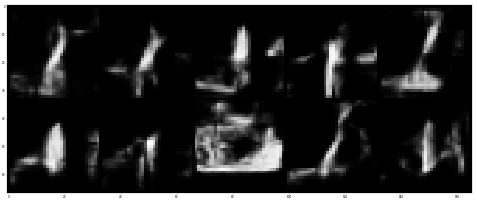

prediction 11 probabitliy max 0.8591964244842529 gan id 47 batch id 20
prediction 11 probabitliy max 0.8596426844596863 gan id 36 batch id 22
prediction 11 probabitliy max 0.8597246408462524 gan id 3 batch id 13
prediction 11 probabitliy max 0.8605269193649292 gan id 22 batch id 19
prediction 11 probabitliy max 0.860844612121582 gan id 13 batch id 22
prediction 11 probabitliy max 0.8611187934875488 gan id 25 batch id 47
prediction 11 probabitliy max 0.8616909980773926 gan id 7 batch id 12
prediction 11 probabitliy max 0.8632344603538513 gan id 4 batch id 35
prediction 11 probabitliy max 0.8643968105316162 gan id 13 batch id 14
prediction 11 probabitliy max 0.869901180267334 gan id 34 batch id 14


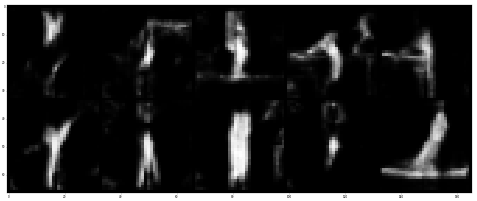

prediction 11 probabitliy max 0.8709072470664978 gan id 5 batch id 23
prediction 11 probabitliy max 0.8736098408699036 gan id 46 batch id 6
prediction 11 probabitliy max 0.8736469745635986 gan id 20 batch id 31
prediction 11 probabitliy max 0.8754539489746094 gan id 48 batch id 41
prediction 11 probabitliy max 0.8755549192428589 gan id 33 batch id 25
prediction 11 probabitliy max 0.8755866885185242 gan id 10 batch id 4
prediction 11 probabitliy max 0.8776633143424988 gan id 26 batch id 49
prediction 11 probabitliy max 0.8781279921531677 gan id 37 batch id 30
prediction 11 probabitliy max 0.8813278079032898 gan id 25 batch id 11
prediction 11 probabitliy max 0.8864410519599915 gan id 21 batch id 5


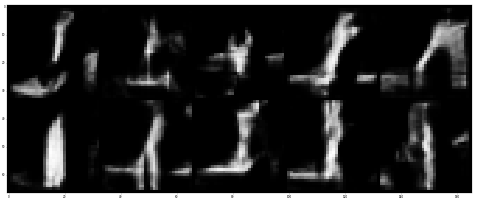

prediction 11 probabitliy max 0.8866705894470215 gan id 44 batch id 34
prediction 11 probabitliy max 0.8892030119895935 gan id 48 batch id 36
prediction 11 probabitliy max 0.8900445699691772 gan id 8 batch id 5
prediction 11 probabitliy max 0.8903960585594177 gan id 6 batch id 48
prediction 11 probabitliy max 0.8914862275123596 gan id 11 batch id 47
prediction 11 probabitliy max 0.8919811248779297 gan id 43 batch id 12
prediction 11 probabitliy max 0.8932614922523499 gan id 22 batch id 16
prediction 11 probabitliy max 0.8996095657348633 gan id 41 batch id 9
prediction 11 probabitliy max 0.8997549414634705 gan id 6 batch id 20
prediction 11 probabitliy max 0.90241938829422 gan id 11 batch id 1


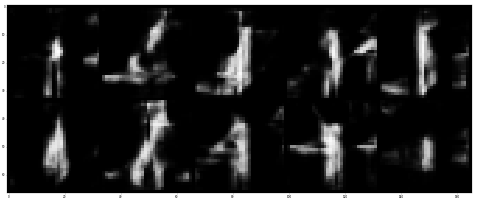

prediction 11 probabitliy max 0.9028553366661072 gan id 40 batch id 13
prediction 11 probabitliy max 0.9029191136360168 gan id 22 batch id 28
prediction 11 probabitliy max 0.9061418771743774 gan id 49 batch id 0
prediction 11 probabitliy max 0.9064443111419678 gan id 43 batch id 28
prediction 11 probabitliy max 0.9070911407470703 gan id 16 batch id 12
prediction 11 probabitliy max 0.9092859625816345 gan id 0 batch id 11
prediction 11 probabitliy max 0.9095279574394226 gan id 35 batch id 31
prediction 11 probabitliy max 0.9101578593254089 gan id 35 batch id 45
prediction 11 probabitliy max 0.9130659699440002 gan id 6 batch id 7
prediction 11 probabitliy max 0.9136556386947632 gan id 34 batch id 42


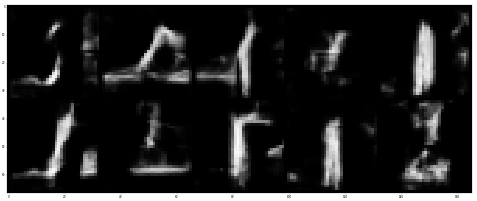

prediction 11 probabitliy max 0.9158348441123962 gan id 4 batch id 45
prediction 11 probabitliy max 0.9160632491111755 gan id 36 batch id 14
prediction 11 probabitliy max 0.9161335229873657 gan id 21 batch id 24
prediction 11 probabitliy max 0.920570433139801 gan id 22 batch id 21
prediction 11 probabitliy max 0.923986554145813 gan id 19 batch id 7
prediction 11 probabitliy max 0.9262125492095947 gan id 35 batch id 4
prediction 11 probabitliy max 0.9268655180931091 gan id 47 batch id 35
prediction 11 probabitliy max 0.9294217824935913 gan id 20 batch id 21
prediction 11 probabitliy max 0.9296309947967529 gan id 29 batch id 26
prediction 11 probabitliy max 0.9299174547195435 gan id 12 batch id 23


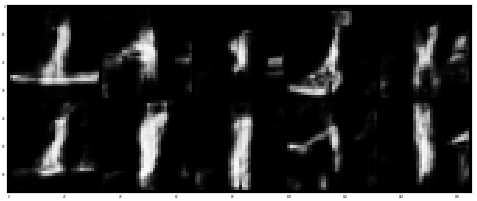

prediction 11 probabitliy max 0.9314537644386292 gan id 25 batch id 42
prediction 11 probabitliy max 0.9323620200157166 gan id 8 batch id 42
prediction 11 probabitliy max 0.9326537251472473 gan id 35 batch id 18
prediction 11 probabitliy max 0.9365179538726807 gan id 48 batch id 0
prediction 11 probabitliy max 0.938258945941925 gan id 8 batch id 17
prediction 11 probabitliy max 0.9387083053588867 gan id 45 batch id 30
prediction 11 probabitliy max 0.939391553401947 gan id 4 batch id 45
prediction 11 probabitliy max 0.9401936531066895 gan id 7 batch id 44
prediction 11 probabitliy max 0.9404574036598206 gan id 16 batch id 35
prediction 11 probabitliy max 0.9405138492584229 gan id 28 batch id 38


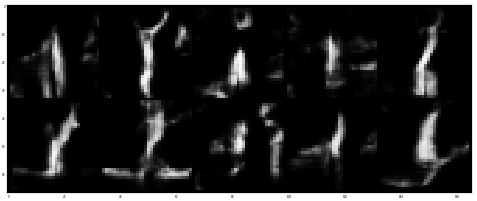

prediction 11 probabitliy max 0.9419240355491638 gan id 9 batch id 12
prediction 11 probabitliy max 0.9436822533607483 gan id 5 batch id 7
prediction 11 probabitliy max 0.9470346570014954 gan id 43 batch id 24
prediction 11 probabitliy max 0.9470807313919067 gan id 11 batch id 37
prediction 11 probabitliy max 0.9527417421340942 gan id 42 batch id 0
prediction 11 probabitliy max 0.9532684683799744 gan id 10 batch id 31
prediction 11 probabitliy max 0.9532843828201294 gan id 2 batch id 12
prediction 11 probabitliy max 0.9538454413414001 gan id 44 batch id 48
prediction 11 probabitliy max 0.9545943737030029 gan id 46 batch id 47
prediction 11 probabitliy max 0.9558925628662109 gan id 31 batch id 33


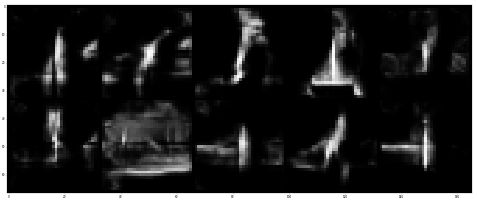

prediction 11 probabitliy max 0.9560037851333618 gan id 17 batch id 46
prediction 11 probabitliy max 0.9587876200675964 gan id 45 batch id 3
prediction 11 probabitliy max 0.9598590135574341 gan id 14 batch id 19
prediction 11 probabitliy max 0.9599299430847168 gan id 4 batch id 46
prediction 11 probabitliy max 0.9624915719032288 gan id 25 batch id 45
prediction 11 probabitliy max 0.9632712602615356 gan id 49 batch id 48
prediction 11 probabitliy max 0.9638280868530273 gan id 9 batch id 31
prediction 11 probabitliy max 0.9657427668571472 gan id 37 batch id 46
prediction 11 probabitliy max 0.9706928730010986 gan id 0 batch id 31
prediction 11 probabitliy max 0.9722252488136292 gan id 49 batch id 36


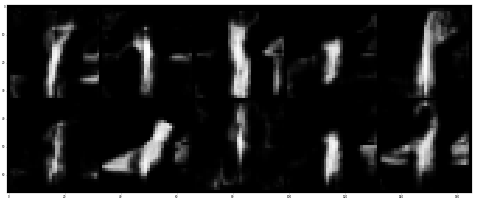

prediction 11 probabitliy max 0.9728114008903503 gan id 45 batch id 38
prediction 11 probabitliy max 0.973731279373169 gan id 25 batch id 44
prediction 11 probabitliy max 0.9743174314498901 gan id 3 batch id 9
prediction 11 probabitliy max 0.9744604825973511 gan id 38 batch id 28
prediction 11 probabitliy max 0.9746026992797852 gan id 5 batch id 26
prediction 11 probabitliy max 0.9748992323875427 gan id 46 batch id 35
prediction 11 probabitliy max 0.9773838520050049 gan id 32 batch id 30
prediction 11 probabitliy max 0.9779506921768188 gan id 24 batch id 1
prediction 11 probabitliy max 0.9782147407531738 gan id 5 batch id 38
prediction 11 probabitliy max 0.9788156747817993 gan id 16 batch id 33


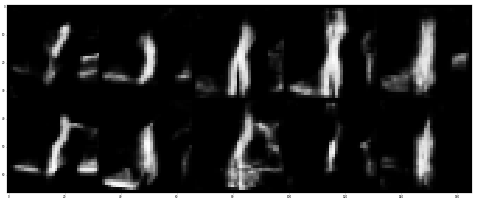

prediction 11 probabitliy max 0.9805749654769897 gan id 28 batch id 39
prediction 11 probabitliy max 0.9846062660217285 gan id 13 batch id 39
prediction 11 probabitliy max 0.9846625924110413 gan id 37 batch id 45
prediction 11 probabitliy max 0.9852054715156555 gan id 11 batch id 19
prediction 11 probabitliy max 0.9856453537940979 gan id 42 batch id 2
prediction 11 probabitliy max 0.9872596859931946 gan id 2 batch id 39
prediction 11 probabitliy max 0.9874696731567383 gan id 14 batch id 13
prediction 11 probabitliy max 0.9880405068397522 gan id 1 batch id 32
prediction 11 probabitliy max 0.9884090423583984 gan id 9 batch id 37
prediction 11 probabitliy max 0.9884655475616455 gan id 4 batch id 2


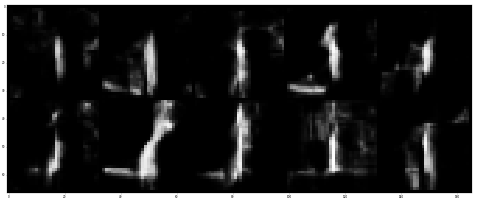

prediction 11 probabitliy max 0.9888445734977722 gan id 34 batch id 2
prediction 11 probabitliy max 0.9899136424064636 gan id 47 batch id 29
prediction 11 probabitliy max 0.9899155497550964 gan id 31 batch id 28
prediction 11 probabitliy max 0.9913685321807861 gan id 8 batch id 27
prediction 11 probabitliy max 0.9929457902908325 gan id 15 batch id 20
prediction 11 probabitliy max 0.9934923648834229 gan id 48 batch id 4
prediction 11 probabitliy max 0.9945379495620728 gan id 11 batch id 40
prediction 11 probabitliy max 0.9946916699409485 gan id 19 batch id 21
prediction 11 probabitliy max 0.9947144389152527 gan id 37 batch id 18
prediction 11 probabitliy max 0.995377779006958 gan id 33 batch id 40


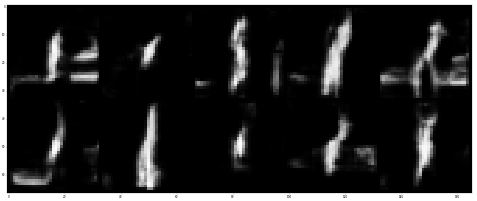

In [27]:
print(len(topdata))
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

In [28]:
topdata = utils.eval_all_from_folder('data/fashion_single_gan100/', model=fmnist_cnn, device=dev1, topk=300, startgan=0, endgan=50, n_batches=50, target=11)
# mgan_data = np.load('data/mgan10/Samples_10gen.npy')

evaluating gan 0
evaluating gan 1
evaluating gan 2
evaluating gan 3
evaluating gan 4
evaluating gan 5
evaluating gan 6
evaluating gan 7
evaluating gan 8
evaluating gan 9
evaluating gan 10
evaluating gan 11
evaluating gan 12
evaluating gan 13
evaluating gan 14
evaluating gan 15
evaluating gan 16
evaluating gan 17
evaluating gan 18
evaluating gan 19
evaluating gan 20
evaluating gan 21
evaluating gan 22
evaluating gan 23
evaluating gan 24
evaluating gan 25
evaluating gan 26
evaluating gan 27
evaluating gan 28
evaluating gan 29
evaluating gan 30
evaluating gan 31
evaluating gan 32
evaluating gan 33
evaluating gan 34
evaluating gan 35
evaluating gan 36
evaluating gan 37
evaluating gan 38
evaluating gan 39
evaluating gan 40
evaluating gan 41
evaluating gan 42
evaluating gan 43
evaluating gan 44
evaluating gan 45
evaluating gan 46
evaluating gan 47
evaluating gan 48
evaluating gan 49


13
prediction 11 probabitliy max 0.3628210723400116 gan id 18 batch id 13
prediction 11 probabitliy max 0.40887928009033203 gan id 45 batch id 16
prediction 11 probabitliy max 0.4122123718261719 gan id 5 batch id 32
prediction 11 probabitliy max 0.41858017444610596 gan id 48 batch id 48
prediction 11 probabitliy max 0.4305557310581207 gan id 24 batch id 25
prediction 11 probabitliy max 0.4356665015220642 gan id 2 batch id 16
prediction 11 probabitliy max 0.437778115272522 gan id 45 batch id 45
prediction 11 probabitliy max 0.45737382769584656 gan id 26 batch id 1
prediction 11 probabitliy max 0.5332880616188049 gan id 6 batch id 18
prediction 11 probabitliy max 0.590613603591919 gan id 2 batch id 16


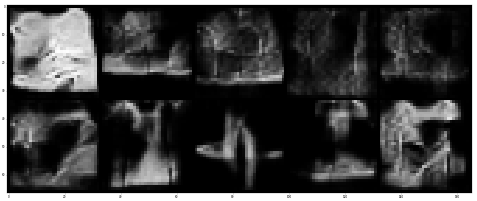

In [29]:
print(len(topdata))
vis = importlib.reload(vis)
vis.show_topk(topdata, 10)

In [30]:
# mgan_data = np.load('data/mgan10/Samples_10gen.npy')

In [31]:
print(mgan_data.shape)

(300000, 1, 32, 32)


In [32]:
mgan_data = None

In [54]:
import mnist_classifier
mnist_cnn = mnist_classifier.Net()
mnist_cnn.load_state_dict(torch.load('data/mnist_cnn.pt'))

In [55]:
dev = torch.device('cuda:0')
fmnist_cnn = fmnist_cnn.to(device=dev)
mnist_cnn = mnist_cnn.to(device=dev)
utils = importlib.reload(utils)
# mgan_topk = utils.eval_npy('data/mgan10/Samples_10gen.npy', model=fmnist_cnn, device=dev, target=11, topk=1000)
mgan_topk = utils.eval_npy('data/mgan10/Samples_10gen.npy', model=mnist_cnn, device=dev, target=1, topk=1000)

np data size (300000, 1, 32, 32)
0 / 300000
500 / 300000
1000 / 300000
1500 / 300000
2000 / 300000
2500 / 300000
3000 / 300000
3500 / 300000
4000 / 300000
4500 / 300000
5000 / 300000
5500 / 300000
6000 / 300000
6500 / 300000
7000 / 300000
7500 / 300000
8000 / 300000
8500 / 300000
9000 / 300000
9500 / 300000
10000 / 300000
10500 / 300000
11000 / 300000
11500 / 300000
12000 / 300000
12500 / 300000
13000 / 300000
13500 / 300000
14000 / 300000
14500 / 300000
15000 / 300000
15500 / 300000
16000 / 300000
16500 / 300000
17000 / 300000
17500 / 300000
18000 / 300000
18500 / 300000
19000 / 300000
19500 / 300000
20000 / 300000
20500 / 300000
21000 / 300000
21500 / 300000
22000 / 300000
22500 / 300000
23000 / 300000
23500 / 300000
24000 / 300000
24500 / 300000
25000 / 300000
25500 / 300000
26000 / 300000
26500 / 300000
27000 / 300000
27500 / 300000
28000 / 300000
28500 / 300000
29000 / 300000
29500 / 300000
30000 / 300000
30500 / 300000
31000 / 300000
31500 / 300000
32000 / 300000
32500 / 300000
3

262000 / 300000
262500 / 300000
263000 / 300000
263500 / 300000
264000 / 300000
264500 / 300000
265000 / 300000
265500 / 300000
266000 / 300000
266500 / 300000
267000 / 300000
267500 / 300000
268000 / 300000
268500 / 300000
269000 / 300000
269500 / 300000
270000 / 300000
270500 / 300000
271000 / 300000
271500 / 300000
272000 / 300000
272500 / 300000
273000 / 300000
273500 / 300000
274000 / 300000
274500 / 300000
275000 / 300000
275500 / 300000
276000 / 300000
276500 / 300000
277000 / 300000
277500 / 300000
278000 / 300000
278500 / 300000
279000 / 300000
279500 / 300000
280000 / 300000
280500 / 300000
281000 / 300000
281500 / 300000
282000 / 300000
282500 / 300000
283000 / 300000
283500 / 300000
284000 / 300000
284500 / 300000
285000 / 300000
285500 / 300000
286000 / 300000
286500 / 300000
287000 / 300000
287500 / 300000
288000 / 300000
288500 / 300000
289000 / 300000
289500 / 300000
290000 / 300000
290500 / 300000
291000 / 300000
291500 / 300000
292000 / 300000
292500 / 300000
293000 /

999
prediction 1 probabitliy max 0.9065878391265869 gan id 155 batch id 0
prediction 1 probabitliy max 0.906615138053894 gan id 135 batch id 0
prediction 1 probabitliy max 0.9066224694252014 gan id 7 batch id 0
prediction 1 probabitliy max 0.9066332578659058 gan id 471 batch id 0
prediction 1 probabitliy max 0.9066483974456787 gan id 382 batch id 0
prediction 1 probabitliy max 0.9066795706748962 gan id 153 batch id 0
prediction 1 probabitliy max 0.9066881537437439 gan id 60 batch id 0
prediction 1 probabitliy max 0.906930685043335 gan id 343 batch id 0
prediction 1 probabitliy max 0.906975269317627 gan id 338 batch id 0
prediction 1 probabitliy max 0.9072369933128357 gan id 470 batch id 0
prediction 1 probabitliy max 0.9073564410209656 gan id 324 batch id 0
prediction 1 probabitliy max 0.907381534576416 gan id 398 batch id 0
prediction 1 probabitliy max 0.9074961543083191 gan id 425 batch id 0
prediction 1 probabitliy max 0.907571017742157 gan id 318 batch id 0
prediction 1 probabitliy

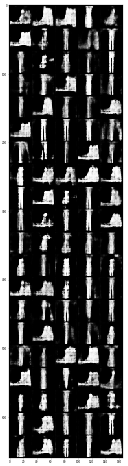

prediction 1 probabitliy max 0.9117255210876465 gan id 382 batch id 0
prediction 1 probabitliy max 0.9118238091468811 gan id 479 batch id 0
prediction 1 probabitliy max 0.9118785858154297 gan id 475 batch id 0
prediction 1 probabitliy max 0.9118863940238953 gan id 21 batch id 0
prediction 1 probabitliy max 0.9120190143585205 gan id 44 batch id 0
prediction 1 probabitliy max 0.912102997303009 gan id 352 batch id 0
prediction 1 probabitliy max 0.9121108055114746 gan id 143 batch id 0
prediction 1 probabitliy max 0.9121303558349609 gan id 358 batch id 0
prediction 1 probabitliy max 0.9121356010437012 gan id 325 batch id 0
prediction 1 probabitliy max 0.9121386408805847 gan id 479 batch id 0
prediction 1 probabitliy max 0.9121634364128113 gan id 344 batch id 0
prediction 1 probabitliy max 0.9122260808944702 gan id 134 batch id 0
prediction 1 probabitliy max 0.9122273325920105 gan id 352 batch id 0
prediction 1 probabitliy max 0.9122604131698608 gan id 335 batch id 0
prediction 1 probabitli

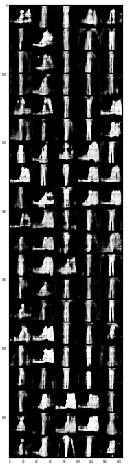

prediction 1 probabitliy max 0.9164577722549438 gan id 126 batch id 0
prediction 1 probabitliy max 0.9165539145469666 gan id 352 batch id 0
prediction 1 probabitliy max 0.9166001677513123 gan id 327 batch id 0
prediction 1 probabitliy max 0.916662335395813 gan id 343 batch id 0
prediction 1 probabitliy max 0.9167270064353943 gan id 43 batch id 0
prediction 1 probabitliy max 0.9168432950973511 gan id 122 batch id 0
prediction 1 probabitliy max 0.9169849753379822 gan id 31 batch id 0
prediction 1 probabitliy max 0.9170422554016113 gan id 21 batch id 0
prediction 1 probabitliy max 0.9170430898666382 gan id 326 batch id 0
prediction 1 probabitliy max 0.9170675873756409 gan id 27 batch id 0
prediction 1 probabitliy max 0.917097806930542 gan id 335 batch id 0
prediction 1 probabitliy max 0.9171192049980164 gan id 167 batch id 0
prediction 1 probabitliy max 0.9172001481056213 gan id 458 batch id 0
prediction 1 probabitliy max 0.9172088503837585 gan id 139 batch id 0
prediction 1 probabitliy m

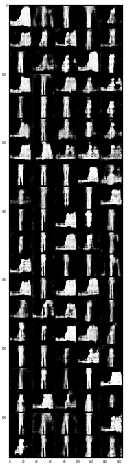

prediction 1 probabitliy max 0.9220411777496338 gan id 317 batch id 0
prediction 1 probabitliy max 0.9220939874649048 gan id 358 batch id 0
prediction 1 probabitliy max 0.9222456812858582 gan id 55 batch id 0
prediction 1 probabitliy max 0.9222975969314575 gan id 13 batch id 0
prediction 1 probabitliy max 0.9222975969314575 gan id 428 batch id 0
prediction 1 probabitliy max 0.9223252534866333 gan id 324 batch id 0
prediction 1 probabitliy max 0.9223406910896301 gan id 72 batch id 0
prediction 1 probabitliy max 0.9224418997764587 gan id 364 batch id 0
prediction 1 probabitliy max 0.9226688146591187 gan id 435 batch id 0
prediction 1 probabitliy max 0.9230556488037109 gan id 334 batch id 0
prediction 1 probabitliy max 0.9230661988258362 gan id 328 batch id 0
prediction 1 probabitliy max 0.9230776429176331 gan id 29 batch id 0
prediction 1 probabitliy max 0.9231115579605103 gan id 139 batch id 0
prediction 1 probabitliy max 0.9231401681900024 gan id 358 batch id 0
prediction 1 probabitliy

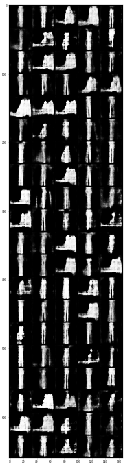

prediction 1 probabitliy max 0.9273089170455933 gan id 12 batch id 0
prediction 1 probabitliy max 0.9273420572280884 gan id 106 batch id 0
prediction 1 probabitliy max 0.9275122880935669 gan id 432 batch id 0
prediction 1 probabitliy max 0.9275627136230469 gan id 304 batch id 0
prediction 1 probabitliy max 0.9275773167610168 gan id 355 batch id 0
prediction 1 probabitliy max 0.9275795817375183 gan id 333 batch id 0
prediction 1 probabitliy max 0.9275936484336853 gan id 147 batch id 0
prediction 1 probabitliy max 0.9276980757713318 gan id 353 batch id 0
prediction 1 probabitliy max 0.9276993870735168 gan id 54 batch id 0
prediction 1 probabitliy max 0.92772376537323 gan id 8 batch id 0
prediction 1 probabitliy max 0.9278135299682617 gan id 48 batch id 0
prediction 1 probabitliy max 0.927882969379425 gan id 4 batch id 0
prediction 1 probabitliy max 0.9279011487960815 gan id 303 batch id 0
prediction 1 probabitliy max 0.9279038310050964 gan id 46 batch id 0
prediction 1 probabitliy max 0.

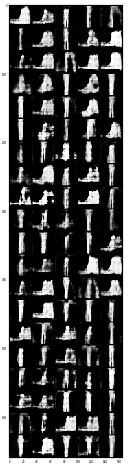

prediction 1 probabitliy max 0.9335525631904602 gan id 358 batch id 0
prediction 1 probabitliy max 0.9335859417915344 gan id 339 batch id 0
prediction 1 probabitliy max 0.9337729215621948 gan id 335 batch id 0
prediction 1 probabitliy max 0.9338058829307556 gan id 321 batch id 0
prediction 1 probabitliy max 0.9338544011116028 gan id 47 batch id 0
prediction 1 probabitliy max 0.9338940382003784 gan id 4 batch id 0
prediction 1 probabitliy max 0.9339239001274109 gan id 303 batch id 0
prediction 1 probabitliy max 0.933992862701416 gan id 389 batch id 0
prediction 1 probabitliy max 0.9340997934341431 gan id 78 batch id 0
prediction 1 probabitliy max 0.9342539310455322 gan id 431 batch id 0
prediction 1 probabitliy max 0.934290885925293 gan id 129 batch id 0
prediction 1 probabitliy max 0.9343167543411255 gan id 467 batch id 0
prediction 1 probabitliy max 0.9343661665916443 gan id 326 batch id 0
prediction 1 probabitliy max 0.9344161152839661 gan id 430 batch id 0
prediction 1 probabitliy m

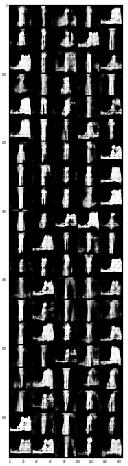

prediction 1 probabitliy max 0.9402852058410645 gan id 341 batch id 0
prediction 1 probabitliy max 0.9403215050697327 gan id 442 batch id 0
prediction 1 probabitliy max 0.9403250217437744 gan id 92 batch id 0
prediction 1 probabitliy max 0.9407044649124146 gan id 13 batch id 0
prediction 1 probabitliy max 0.9407995939254761 gan id 449 batch id 0
prediction 1 probabitliy max 0.94082111120224 gan id 458 batch id 0
prediction 1 probabitliy max 0.9408336281776428 gan id 330 batch id 0
prediction 1 probabitliy max 0.9408974051475525 gan id 325 batch id 0
prediction 1 probabitliy max 0.9409040808677673 gan id 467 batch id 0
prediction 1 probabitliy max 0.9409288167953491 gan id 142 batch id 0
prediction 1 probabitliy max 0.9409574866294861 gan id 336 batch id 0
prediction 1 probabitliy max 0.9409840106964111 gan id 437 batch id 0
prediction 1 probabitliy max 0.941063404083252 gan id 442 batch id 0
prediction 1 probabitliy max 0.9410674571990967 gan id 155 batch id 0
prediction 1 probabitliy 

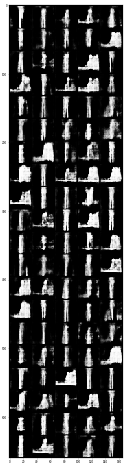

prediction 1 probabitliy max 0.948677122592926 gan id 348 batch id 0
prediction 1 probabitliy max 0.948854923248291 gan id 2 batch id 0
prediction 1 probabitliy max 0.9489228129386902 gan id 480 batch id 0
prediction 1 probabitliy max 0.9489956498146057 gan id 329 batch id 0
prediction 1 probabitliy max 0.9491508603096008 gan id 318 batch id 0
prediction 1 probabitliy max 0.949191153049469 gan id 320 batch id 0
prediction 1 probabitliy max 0.9492382407188416 gan id 329 batch id 0
prediction 1 probabitliy max 0.9493532180786133 gan id 454 batch id 0
prediction 1 probabitliy max 0.9494220614433289 gan id 452 batch id 0
prediction 1 probabitliy max 0.9494537115097046 gan id 60 batch id 0
prediction 1 probabitliy max 0.9494668245315552 gan id 421 batch id 0
prediction 1 probabitliy max 0.949476420879364 gan id 475 batch id 0
prediction 1 probabitliy max 0.9495125412940979 gan id 442 batch id 0
prediction 1 probabitliy max 0.9495139718055725 gan id 305 batch id 0
prediction 1 probabitliy ma

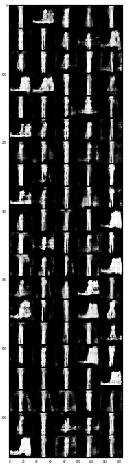

prediction 1 probabitliy max 0.9569063782691956 gan id 5 batch id 0
prediction 1 probabitliy max 0.9569159746170044 gan id 319 batch id 0
prediction 1 probabitliy max 0.9569501876831055 gan id 351 batch id 0
prediction 1 probabitliy max 0.9571135640144348 gan id 478 batch id 0
prediction 1 probabitliy max 0.9571714401245117 gan id 311 batch id 0
prediction 1 probabitliy max 0.9574074745178223 gan id 440 batch id 0
prediction 1 probabitliy max 0.9575408101081848 gan id 356 batch id 0
prediction 1 probabitliy max 0.9575750827789307 gan id 305 batch id 0
prediction 1 probabitliy max 0.9575782418251038 gan id 318 batch id 0
prediction 1 probabitliy max 0.957660436630249 gan id 348 batch id 0
prediction 1 probabitliy max 0.9577468037605286 gan id 355 batch id 0
prediction 1 probabitliy max 0.9577819108963013 gan id 347 batch id 0
prediction 1 probabitliy max 0.9578253030776978 gan id 353 batch id 0
prediction 1 probabitliy max 0.9581993818283081 gan id 139 batch id 0
prediction 1 probabitli

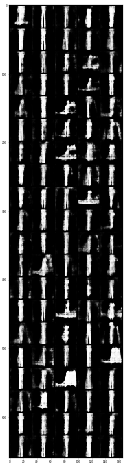

In [56]:
print(len(mgan_topk))
vis = importlib.reload(vis)
vis.show_topk(mgan_topk, 100)

In [4]:
import fmnist_classifier
import torch
import numpy as np
import vis
import importlib
vis = importlib.reload(vis)
dev1 = torch.device('cuda:1')
fmnist_cnn = fmnist_classifier.FNet()
fmnist_cnn.load_state_dict(torch.load('data/fmnist_cnn.pt'))
fmnist_cnn = fmnist_cnn.to(device=dev1)
mgan_data = np.load('data/mgan20/Samples_20gen.npy')
vis.show_npy(mgan_data, 10, 10)

AttributeError: 'NpzFile' object has no attribute 'shape'

In [67]:
fmnist_cnn = fmnist_cnn.to(device=dev)
topdata_naive = utils.eval_all_from_folder('data/fashion_naive/', model=fmnist_cnn, device=dev, topk=300, startgan=0, endgan=50, n_batches=50, target=11)


evaluating gan 0
evaluating gan 1
evaluating gan 2
evaluating gan 3
evaluating gan 4
evaluating gan 5
evaluating gan 6
evaluating gan 7
evaluating gan 8
evaluating gan 9
evaluating gan 10
evaluating gan 11
evaluating gan 12
evaluating gan 13
evaluating gan 14
evaluating gan 15
evaluating gan 16
evaluating gan 17
evaluating gan 18
evaluating gan 19
evaluating gan 20
evaluating gan 21
evaluating gan 22
evaluating gan 23
evaluating gan 24
evaluating gan 25
evaluating gan 26
evaluating gan 27
evaluating gan 28
evaluating gan 29
evaluating gan 30
evaluating gan 31
evaluating gan 32
evaluating gan 33
evaluating gan 34
evaluating gan 35
evaluating gan 36
evaluating gan 37
evaluating gan 38
evaluating gan 39
evaluating gan 40
evaluating gan 41
evaluating gan 42
evaluating gan 43
evaluating gan 44
evaluating gan 45
evaluating gan 46
evaluating gan 47
evaluating gan 48
evaluating gan 49


226
prediction 11 probabitliy max 0.1557859182357788 gan id 39 batch id 17
prediction 11 probabitliy max 0.17781253159046173 gan id 18 batch id 38
prediction 11 probabitliy max 0.19874300062656403 gan id 11 batch id 44
prediction 11 probabitliy max 0.2039230465888977 gan id 29 batch id 22
prediction 11 probabitliy max 0.20791438221931458 gan id 48 batch id 39
prediction 11 probabitliy max 0.21910052001476288 gan id 42 batch id 12
prediction 11 probabitliy max 0.22773562371730804 gan id 9 batch id 49
prediction 11 probabitliy max 0.2296646237373352 gan id 18 batch id 40
prediction 11 probabitliy max 0.25184106826782227 gan id 42 batch id 43
prediction 11 probabitliy max 0.25376975536346436 gan id 22 batch id 13


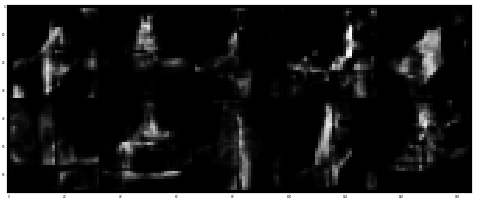

prediction 11 probabitliy max 0.255403995513916 gan id 15 batch id 7
prediction 11 probabitliy max 0.26184630393981934 gan id 8 batch id 12
prediction 11 probabitliy max 0.2664691209793091 gan id 15 batch id 20
prediction 11 probabitliy max 0.27464577555656433 gan id 27 batch id 22
prediction 11 probabitliy max 0.27714958786964417 gan id 26 batch id 39
prediction 11 probabitliy max 0.27738121151924133 gan id 28 batch id 25
prediction 11 probabitliy max 0.2780609726905823 gan id 36 batch id 32
prediction 11 probabitliy max 0.27954354882240295 gan id 31 batch id 3
prediction 11 probabitliy max 0.2872478663921356 gan id 10 batch id 42
prediction 11 probabitliy max 0.28916412591934204 gan id 37 batch id 35


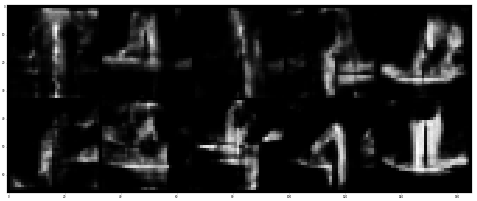

prediction 11 probabitliy max 0.28935450315475464 gan id 29 batch id 24
prediction 11 probabitliy max 0.28950685262680054 gan id 18 batch id 7
prediction 11 probabitliy max 0.2895965874195099 gan id 3 batch id 13
prediction 11 probabitliy max 0.29451608657836914 gan id 10 batch id 31
prediction 11 probabitliy max 0.29594963788986206 gan id 21 batch id 34
prediction 11 probabitliy max 0.30411985516548157 gan id 9 batch id 33
prediction 11 probabitliy max 0.3104647397994995 gan id 22 batch id 9
prediction 11 probabitliy max 0.3190547227859497 gan id 45 batch id 33
prediction 11 probabitliy max 0.3190608024597168 gan id 27 batch id 27
prediction 11 probabitliy max 0.3210233449935913 gan id 22 batch id 4


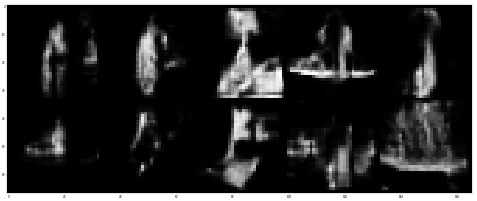

prediction 11 probabitliy max 0.3253015875816345 gan id 15 batch id 1
prediction 11 probabitliy max 0.3354138731956482 gan id 36 batch id 39
prediction 11 probabitliy max 0.3363558053970337 gan id 22 batch id 48
prediction 11 probabitliy max 0.3384789228439331 gan id 47 batch id 5
prediction 11 probabitliy max 0.3487968444824219 gan id 29 batch id 4
prediction 11 probabitliy max 0.349046915769577 gan id 8 batch id 2
prediction 11 probabitliy max 0.35040050745010376 gan id 43 batch id 20
prediction 11 probabitliy max 0.35782188177108765 gan id 4 batch id 8
prediction 11 probabitliy max 0.36078721284866333 gan id 36 batch id 2
prediction 11 probabitliy max 0.36124393343925476 gan id 45 batch id 45


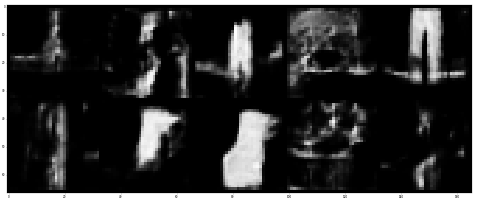

prediction 11 probabitliy max 0.3613574802875519 gan id 4 batch id 29
prediction 11 probabitliy max 0.3629932701587677 gan id 24 batch id 35
prediction 11 probabitliy max 0.3650057911872864 gan id 28 batch id 43
prediction 11 probabitliy max 0.3707122504711151 gan id 29 batch id 41
prediction 11 probabitliy max 0.37183502316474915 gan id 26 batch id 37
prediction 11 probabitliy max 0.3847160339355469 gan id 23 batch id 45
prediction 11 probabitliy max 0.38554149866104126 gan id 31 batch id 35
prediction 11 probabitliy max 0.38557806611061096 gan id 18 batch id 20
prediction 11 probabitliy max 0.38735881447792053 gan id 20 batch id 6
prediction 11 probabitliy max 0.38780567049980164 gan id 18 batch id 47


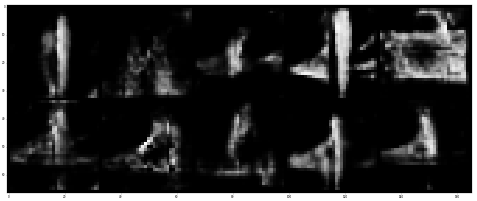

prediction 11 probabitliy max 0.38913238048553467 gan id 36 batch id 18
prediction 11 probabitliy max 0.3891763389110565 gan id 9 batch id 43
prediction 11 probabitliy max 0.391146719455719 gan id 17 batch id 31
prediction 11 probabitliy max 0.3951858580112457 gan id 5 batch id 20
prediction 11 probabitliy max 0.3965133726596832 gan id 35 batch id 17
prediction 11 probabitliy max 0.3995077908039093 gan id 17 batch id 43
prediction 11 probabitliy max 0.39968711137771606 gan id 5 batch id 30
prediction 11 probabitliy max 0.40075430274009705 gan id 18 batch id 3
prediction 11 probabitliy max 0.4080635607242584 gan id 28 batch id 1
prediction 11 probabitliy max 0.4082196354866028 gan id 15 batch id 10


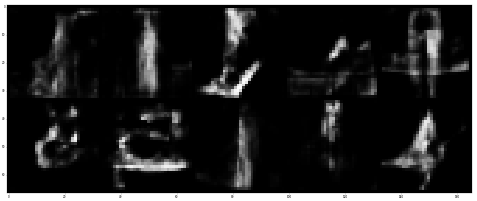

prediction 11 probabitliy max 0.41109976172447205 gan id 36 batch id 3
prediction 11 probabitliy max 0.41124993562698364 gan id 13 batch id 12
prediction 11 probabitliy max 0.4133375883102417 gan id 17 batch id 8
prediction 11 probabitliy max 0.41476428508758545 gan id 11 batch id 25
prediction 11 probabitliy max 0.4174109995365143 gan id 28 batch id 11
prediction 11 probabitliy max 0.41826891899108887 gan id 34 batch id 22
prediction 11 probabitliy max 0.41908544301986694 gan id 8 batch id 20
prediction 11 probabitliy max 0.420166552066803 gan id 18 batch id 26
prediction 11 probabitliy max 0.4219047725200653 gan id 48 batch id 20
prediction 11 probabitliy max 0.4262233376502991 gan id 20 batch id 8


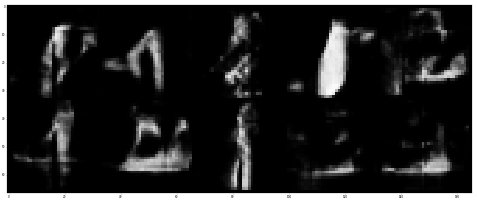

prediction 11 probabitliy max 0.42749345302581787 gan id 3 batch id 21
prediction 11 probabitliy max 0.4285890758037567 gan id 42 batch id 15
prediction 11 probabitliy max 0.4331943690776825 gan id 34 batch id 43
prediction 11 probabitliy max 0.4339708983898163 gan id 10 batch id 9
prediction 11 probabitliy max 0.4342733323574066 gan id 4 batch id 48
prediction 11 probabitliy max 0.43524661660194397 gan id 36 batch id 41
prediction 11 probabitliy max 0.4434082508087158 gan id 18 batch id 35
prediction 11 probabitliy max 0.4451133608818054 gan id 5 batch id 6
prediction 11 probabitliy max 0.4476810693740845 gan id 25 batch id 23
prediction 11 probabitliy max 0.4494514465332031 gan id 19 batch id 45


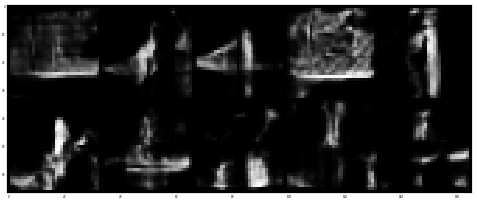

prediction 11 probabitliy max 0.44970011711120605 gan id 47 batch id 40
prediction 11 probabitliy max 0.4514438211917877 gan id 12 batch id 27
prediction 11 probabitliy max 0.4536779820919037 gan id 34 batch id 1
prediction 11 probabitliy max 0.4543844163417816 gan id 46 batch id 7
prediction 11 probabitliy max 0.46085289120674133 gan id 29 batch id 20
prediction 11 probabitliy max 0.46180298924446106 gan id 48 batch id 30
prediction 11 probabitliy max 0.46677249670028687 gan id 36 batch id 46
prediction 11 probabitliy max 0.466852605342865 gan id 36 batch id 24
prediction 11 probabitliy max 0.4676241874694824 gan id 45 batch id 33
prediction 11 probabitliy max 0.46786078810691833 gan id 43 batch id 22


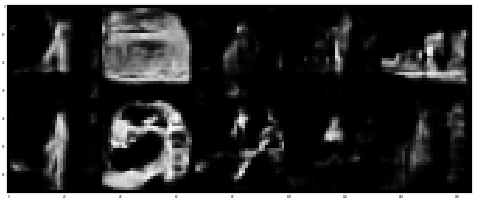

prediction 11 probabitliy max 0.4710817039012909 gan id 36 batch id 23
prediction 11 probabitliy max 0.4728986322879791 gan id 20 batch id 1
prediction 11 probabitliy max 0.4738105237483978 gan id 16 batch id 36
prediction 11 probabitliy max 0.4783402681350708 gan id 45 batch id 44
prediction 11 probabitliy max 0.47970640659332275 gan id 0 batch id 25
prediction 11 probabitliy max 0.48598191142082214 gan id 43 batch id 4
prediction 11 probabitliy max 0.4869629144668579 gan id 30 batch id 17
prediction 11 probabitliy max 0.49390462040901184 gan id 5 batch id 20
prediction 11 probabitliy max 0.4958977699279785 gan id 15 batch id 40
prediction 11 probabitliy max 0.4963810443878174 gan id 37 batch id 31


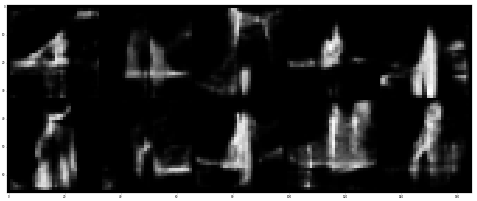

prediction 11 probabitliy max 0.4994993209838867 gan id 21 batch id 3
prediction 11 probabitliy max 0.5019468665122986 gan id 36 batch id 2
prediction 11 probabitliy max 0.5031937956809998 gan id 20 batch id 43
prediction 11 probabitliy max 0.5051901936531067 gan id 14 batch id 4
prediction 11 probabitliy max 0.5085761547088623 gan id 48 batch id 0
prediction 11 probabitliy max 0.5103217959403992 gan id 22 batch id 49
prediction 11 probabitliy max 0.5144246220588684 gan id 35 batch id 43
prediction 11 probabitliy max 0.5153271555900574 gan id 20 batch id 41
prediction 11 probabitliy max 0.5202537775039673 gan id 9 batch id 15
prediction 11 probabitliy max 0.520486056804657 gan id 26 batch id 31


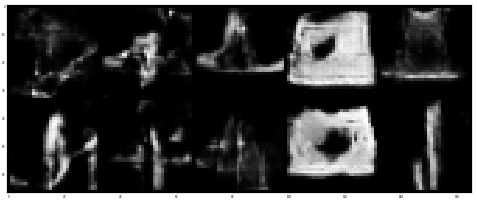

prediction 11 probabitliy max 0.5209195017814636 gan id 36 batch id 17
prediction 11 probabitliy max 0.5220340490341187 gan id 5 batch id 14
prediction 11 probabitliy max 0.5221009850502014 gan id 15 batch id 35
prediction 11 probabitliy max 0.5260252952575684 gan id 36 batch id 29
prediction 11 probabitliy max 0.5267715454101562 gan id 25 batch id 31
prediction 11 probabitliy max 0.5310592651367188 gan id 41 batch id 31
prediction 11 probabitliy max 0.5313637852668762 gan id 30 batch id 45
prediction 11 probabitliy max 0.5324563980102539 gan id 2 batch id 17
prediction 11 probabitliy max 0.5367773771286011 gan id 18 batch id 8
prediction 11 probabitliy max 0.548160970211029 gan id 23 batch id 34


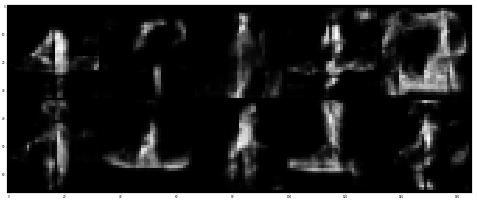

prediction 11 probabitliy max 0.5512984395027161 gan id 8 batch id 31
prediction 11 probabitliy max 0.5562569499015808 gan id 36 batch id 38
prediction 11 probabitliy max 0.5588943958282471 gan id 18 batch id 31
prediction 11 probabitliy max 0.5603524446487427 gan id 48 batch id 48
prediction 11 probabitliy max 0.5604510307312012 gan id 41 batch id 26
prediction 11 probabitliy max 0.563380777835846 gan id 36 batch id 31
prediction 11 probabitliy max 0.5664037466049194 gan id 19 batch id 1
prediction 11 probabitliy max 0.5681972503662109 gan id 20 batch id 42
prediction 11 probabitliy max 0.574909508228302 gan id 15 batch id 39
prediction 11 probabitliy max 0.5756273865699768 gan id 36 batch id 25


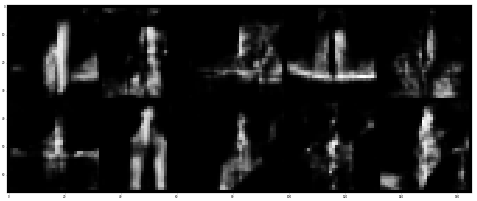

prediction 11 probabitliy max 0.5780619382858276 gan id 16 batch id 26
prediction 11 probabitliy max 0.5796148180961609 gan id 22 batch id 37
prediction 11 probabitliy max 0.5836342573165894 gan id 17 batch id 36
prediction 11 probabitliy max 0.5845405459403992 gan id 48 batch id 11
prediction 11 probabitliy max 0.5901446342468262 gan id 21 batch id 9
prediction 11 probabitliy max 0.5994077324867249 gan id 36 batch id 45
prediction 11 probabitliy max 0.603492796421051 gan id 36 batch id 36
prediction 11 probabitliy max 0.6041161417961121 gan id 39 batch id 9
prediction 11 probabitliy max 0.6072139143943787 gan id 36 batch id 37
prediction 11 probabitliy max 0.6089402437210083 gan id 4 batch id 0


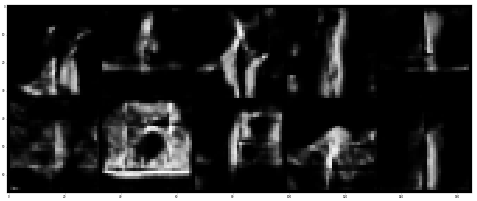

prediction 11 probabitliy max 0.6090804934501648 gan id 49 batch id 29
prediction 11 probabitliy max 0.6116991639137268 gan id 23 batch id 4
prediction 11 probabitliy max 0.613088846206665 gan id 9 batch id 40
prediction 11 probabitliy max 0.6134546399116516 gan id 31 batch id 20
prediction 11 probabitliy max 0.6142722368240356 gan id 29 batch id 42
prediction 11 probabitliy max 0.6193347573280334 gan id 29 batch id 23
prediction 11 probabitliy max 0.6265190839767456 gan id 36 batch id 12
prediction 11 probabitliy max 0.6281757354736328 gan id 34 batch id 4
prediction 11 probabitliy max 0.6290137767791748 gan id 36 batch id 24
prediction 11 probabitliy max 0.6346727609634399 gan id 15 batch id 17


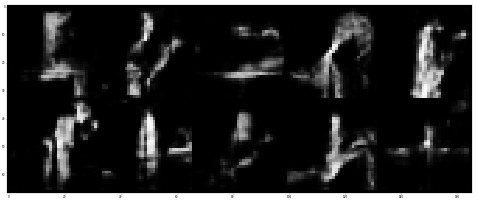

prediction 11 probabitliy max 0.649244487285614 gan id 12 batch id 28
prediction 11 probabitliy max 0.6580817699432373 gan id 17 batch id 0
prediction 11 probabitliy max 0.6610857248306274 gan id 19 batch id 42
prediction 11 probabitliy max 0.670588493347168 gan id 23 batch id 31
prediction 11 probabitliy max 0.6764918565750122 gan id 33 batch id 46
prediction 11 probabitliy max 0.6848941445350647 gan id 28 batch id 27
prediction 11 probabitliy max 0.6928713321685791 gan id 8 batch id 11
prediction 11 probabitliy max 0.695138156414032 gan id 29 batch id 46
prediction 11 probabitliy max 0.6967881917953491 gan id 38 batch id 3
prediction 11 probabitliy max 0.6968725919723511 gan id 18 batch id 7


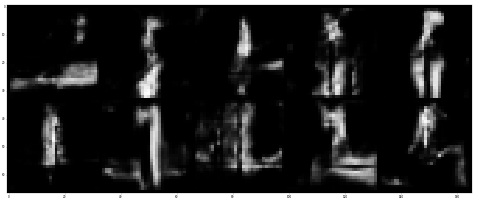

prediction 11 probabitliy max 0.6969895362854004 gan id 22 batch id 42
prediction 11 probabitliy max 0.6983069181442261 gan id 27 batch id 4
prediction 11 probabitliy max 0.6985956430435181 gan id 19 batch id 34
prediction 11 probabitliy max 0.6990578770637512 gan id 36 batch id 3
prediction 11 probabitliy max 0.7003427147865295 gan id 43 batch id 0
prediction 11 probabitliy max 0.7011373043060303 gan id 36 batch id 1
prediction 11 probabitliy max 0.7124204635620117 gan id 36 batch id 3
prediction 11 probabitliy max 0.7129679322242737 gan id 20 batch id 7
prediction 11 probabitliy max 0.7326406240463257 gan id 34 batch id 35
prediction 11 probabitliy max 0.7327216863632202 gan id 34 batch id 19


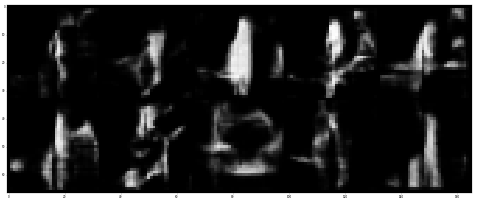

prediction 11 probabitliy max 0.7329452633857727 gan id 26 batch id 45
prediction 11 probabitliy max 0.7384092807769775 gan id 36 batch id 13
prediction 11 probabitliy max 0.7395474314689636 gan id 36 batch id 14
prediction 11 probabitliy max 0.7450131177902222 gan id 36 batch id 49
prediction 11 probabitliy max 0.7497847676277161 gan id 15 batch id 39
prediction 11 probabitliy max 0.7579128742218018 gan id 17 batch id 33
prediction 11 probabitliy max 0.7678992748260498 gan id 17 batch id 27
prediction 11 probabitliy max 0.7725418210029602 gan id 8 batch id 26
prediction 11 probabitliy max 0.7733062505722046 gan id 33 batch id 14
prediction 11 probabitliy max 0.7758980989456177 gan id 33 batch id 33


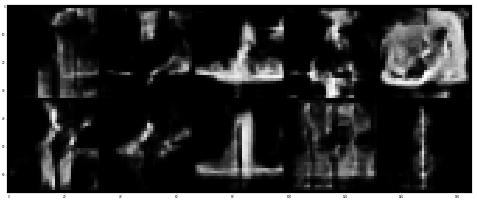

prediction 11 probabitliy max 0.7798271775245667 gan id 9 batch id 12
prediction 11 probabitliy max 0.7800267934799194 gan id 31 batch id 3
prediction 11 probabitliy max 0.7810577750205994 gan id 23 batch id 22
prediction 11 probabitliy max 0.7880141139030457 gan id 22 batch id 47
prediction 11 probabitliy max 0.7938758134841919 gan id 21 batch id 10
prediction 11 probabitliy max 0.7956694960594177 gan id 33 batch id 1
prediction 11 probabitliy max 0.8120457530021667 gan id 21 batch id 47
prediction 11 probabitliy max 0.8135942220687866 gan id 23 batch id 6
prediction 11 probabitliy max 0.8163365125656128 gan id 48 batch id 29
prediction 11 probabitliy max 0.8163926005363464 gan id 9 batch id 12


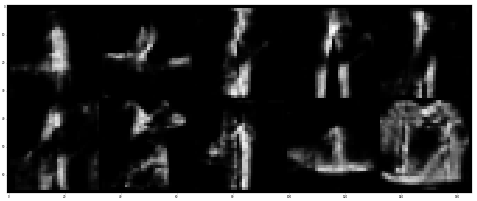

prediction 11 probabitliy max 0.8211451768875122 gan id 16 batch id 13
prediction 11 probabitliy max 0.8219980597496033 gan id 22 batch id 43
prediction 11 probabitliy max 0.8252801895141602 gan id 15 batch id 23
prediction 11 probabitliy max 0.8383584022521973 gan id 17 batch id 24
prediction 11 probabitliy max 0.8426539897918701 gan id 4 batch id 31
prediction 11 probabitliy max 0.8444991111755371 gan id 5 batch id 12
prediction 11 probabitliy max 0.8536666035652161 gan id 15 batch id 48
prediction 11 probabitliy max 0.8539535999298096 gan id 17 batch id 48
prediction 11 probabitliy max 0.8567352294921875 gan id 46 batch id 20
prediction 11 probabitliy max 0.8680775165557861 gan id 36 batch id 2


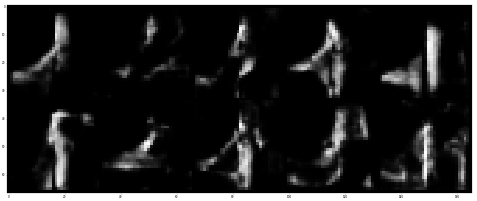

prediction 11 probabitliy max 0.8699447512626648 gan id 20 batch id 31
prediction 11 probabitliy max 0.8781439065933228 gan id 8 batch id 16
prediction 11 probabitliy max 0.8810012936592102 gan id 42 batch id 47
prediction 11 probabitliy max 0.8826959729194641 gan id 37 batch id 26
prediction 11 probabitliy max 0.8897637128829956 gan id 48 batch id 35
prediction 11 probabitliy max 0.8945112228393555 gan id 22 batch id 5
prediction 11 probabitliy max 0.9038495421409607 gan id 34 batch id 20
prediction 11 probabitliy max 0.9073689579963684 gan id 29 batch id 19
prediction 11 probabitliy max 0.9081714749336243 gan id 6 batch id 24
prediction 11 probabitliy max 0.9087883234024048 gan id 18 batch id 14


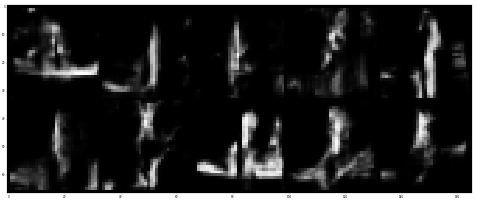

prediction 11 probabitliy max 0.9089400768280029 gan id 34 batch id 46
prediction 11 probabitliy max 0.9109998345375061 gan id 36 batch id 4
prediction 11 probabitliy max 0.9126611351966858 gan id 34 batch id 45
prediction 11 probabitliy max 0.9181987047195435 gan id 39 batch id 47
prediction 11 probabitliy max 0.9184837937355042 gan id 48 batch id 22
prediction 11 probabitliy max 0.9337083697319031 gan id 36 batch id 36
prediction 11 probabitliy max 0.9381368160247803 gan id 15 batch id 25
prediction 11 probabitliy max 0.9408525228500366 gan id 33 batch id 47
prediction 11 probabitliy max 0.9429499506950378 gan id 20 batch id 30
prediction 11 probabitliy max 0.9494392275810242 gan id 2 batch id 21


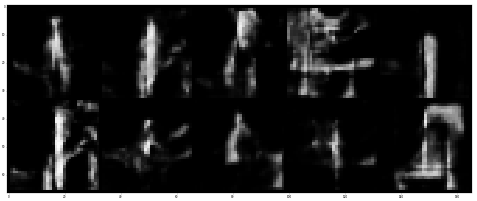

In [68]:
print(len(topdata_naive))
vis.show_topk(topdata_naive, 10)